<h1 align = 'center'> Up-to-date Heart Attack Analysis and Prediction </h1>


### Project Content
* Project Link File: https://www.kaggle.com/code/oaktechacademy/up-to-date-heart-attack-analysis-and-prediction
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 2.2 [Recognizing variables in Datase](#3)
    
 
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading the Dataset](#7)
    * 2.3 [Initial analysis on the dataset](#8)
        * 2.3.1. [Analysis Output](#9)
        
        
3. [Preparing for EDA](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examining Unique Values](#12)
        * 3.2.1 [Analysis Output](#13)
    * 3.3 [Separating Values - Numeric and Categorical](#14)
    * 3.4 [Examining Statistics of Variables](#15)
         * 3.4.1 [Analysis Output](#16)
         

4. [Exploratory Data Analysis(EDA)](#17)
    * 4.1 [Univariate Analysis](#18) 
        * 4.1.1 [Numerical Variables(Analysis with Distplot](#19) 
            * 4.1.1.1 [Analysis Outputs(4)](#20) 
        * 4.1.2 [Categorical Variables(Analysis with Piechart](#21)      
    * 4.2 [Bivariate Analysis](#22) 
        * 4.2.1 [Numerical Variables - Target Variables(Analysis with FacetGrid)](#23) 
        * 4.2.2 [Categorical Variables - Target Variables(Analysis with CountPlot)](#24) 
        * 4.2.3 [Examining Numeric Variables Among Themselves(Analysis with PairPlot)](#25)
        * 4.2.4 [Feature Scaling with the RobustScaler Method](#26)
        * 4.2.5 [Creating a New DataFrame with the Melt() Function](#27)
        * 4.2.6 [Numerical Variables - Categorical Variables (Analysis with Swarm Plot)](#28)
        * 4.2.7 [Numerical Variables - Categorical Variables (Analysis with Box Plot)](#29)
        * 4.2.8 [Relationships between variables (Analysis with Heatmap)](#30)
        

5. [Preparation for Modelling](#31)
    * 5.1 [Droppping columns with Low Correlation](#32) 
    * 5.2 [Struggling Outliers](#33) 
         * 5.2.1 [Visualizing outliers](#34)
         * 5.2.2 [Dealing with outliers](#33)
             * 5.2.2.1 [Trtbps Variable](#34)
             * 5.2.2.2 [Thalach Variable](#35)
             * 5.2.2.3 [Oldpeak Variable](#36)         
    * 5.3 [Determining Distributions of Numeric Variables](#37)
    * 5.4 [Transformation Operations on Unsymmetrical Data](#38)
    * 5.5 [Applying One Hot Encoding Method to categorical Variables](#39)
    * 5.6 [Feature Scaling with the RobustScaler Method for Machine Learning Algorithm](#40)
    * 5.7 [Separating Data into Test and Training Set](#41)
    

6. [Modelling](#42)
    * 6.1 [Logistic Regression Algorithm](#43)
        * 6.1.1 [Cross Validation](#44)
        * 6.1.2 [ROC Curve and Area Under Curve (AUC)](#45)

### 1. Introduction <a id = 1 ></a>

#### 1.1 Examining the Project Topic <a id = 2 ></a>

#### What is a Heart Attack?


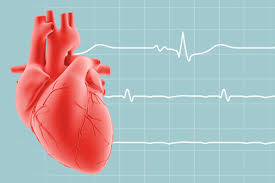

#### 1.2 Recognizing Variables in Dataset <a id = 3 ></a>

#### Variable Definitions in the Dataset

- **Age** : Age of the patient in years

- **Sex** : Sex of the patient (1 = male; 0 = female)

- **cp** : Chest Pain type - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic

- **trtbps** : resting blood pressure (in mm Hg) -  - resting blood pressure (in mm Hg on admission to the hospital)

- **chol**: cholesterol in mg/dl fetched via BMI sensor - serum cholestoral in mg/dl

- **fbs**: (fasting blood sugar > 120 mg/dl) -  fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
1 = true
0 = false

- **rest_ecg**: resting electrocardiographic results - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach**: maximum heart rate achieved

- **exang**: exercise induced angina
1 = yes
0 = no

- **old peak**: ST depression induced by exercise relative to rest

- **slp**: the slope of the peak exercise ST segment
0 = unsloping
1 = flat
2 = downsloping

- **caa**: number of major vessels (0-3) - number of major vessels (0-3) colored by flourosopy

- **thall** : thalassemia - 2 = normal; 1 = fixed defect; 3 = reversable defect
0 = null
1 = fixed defect
2 = normal
3 = reversable defect

- **output**: diagnosis of heart disease (angiographic disease status) - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)
0: < 50% diameter narrowing. less chance of heart disease
1: > 50% diameter narrowing. more chance of heart disease

Note: You can find these variable defn in the discussion section of the "Heart attack and analysis prediction [link](url). We thank kaggle user Jay, who prepared the study.




### First Organization <a id = 4 ></a>


#### 2.1 Required Python Libraries <a id = 5 ></a>

#### 2.1.1 Basic Libraries <a id = 6 ></a>

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

#### 2.2 Loading the Dataset <a id = 7 ></a>

In [2]:
df = pd.read_csv("C:/Users/Hector/Desktop/SMU/SMU Library/Udemy/Machine Learning Project Heart Attack Prediction Analysis/heart.csv")

In [3]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

#### 2.3 Initial analysis on the dataset <a id = 8 ></a>

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
new_col = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", 
           "ca", "thal", "target"]

In [6]:
df.columns = new_col

In [7]:
df.columns
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [8]:
print("Shape of dataset:" , df.shape)

Shape of dataset: (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 2.3.1 Analysis Outputs(1) <a id = 9 ></a>
- The dataset consists of 303 rows and 14 columns.
- The type of all varibles in the dataset are in numerical format, integer or float.
- According to first impressions, there is no missing value (Nan) value in the dataset.


### 3. Preparing for EDA <a id = 10 ></a>

#### 3.1 Examining Missing Values <a id = 11 ></a>

In [10]:
df.isnull()

age    sex     cp  trtbps   chol    fbs  rest_ecg  thalach  exang  \
0    False  False  False   False  False  False     False    False  False   
1    False  False  False   False  False  False     False    False  False   
2    False  False  False   False  False  False     False    False  False   
3    False  False  False   False  False  False     False    False  False   
4    False  False  False   False  False  False     False    False  False   
..     ...    ...    ...     ...    ...    ...       ...      ...    ...   
298  False  False  False   False  False  False     False    False  False   
299  False  False  False   False  False  False     False    False  False   
300  False  False  False   False  False  False     False    False  False   
301  False  False  False   False  False  False     False    False  False   
302  False  False  False   False  False  False     False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False  False  False   False  

[303 rows x 14 columns]

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

In [13]:
import missingno
missingno.bar(df, color = 'b')

ModuleNotFoundError: No module named 'missingno'

#### 3.2 Examining Unique Values <a id = 12 ></a>

In [14]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [15]:
df['cp'].value_counts().sum()

303

In [16]:
df['cp'].value_counts().count()

4

In [17]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
rest_ecg                    3
thalach                    91
exang                       2
oldpeak                    40
slope                       3
ca                          5
thal                        4
target                      2

#### Analysis Outputs(2) <a id = 13 ></a>
* **According to the result from the unique values dataframe;**
* We determined the variables with few unique values  as categorical variables, and the variables with high unique values as numeric variables.
* In this context. **Numeric variables**, *age*, *trtbps*, *chol*, *thalach* and *oldpeak*. 
* **Categorical Variables:** "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
* In the next section, we will separate these 2 groups into 2 different lists.

#### 3.3 Separating Values - Numeric or Categorical <a id = 14 ></a>

In [18]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

#### 3.4 Examining Statistics of Variables <a id = 15 ></a>

In [19]:
df[numeric_var].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

<Axes: xlabel='age', ylabel='Density'>

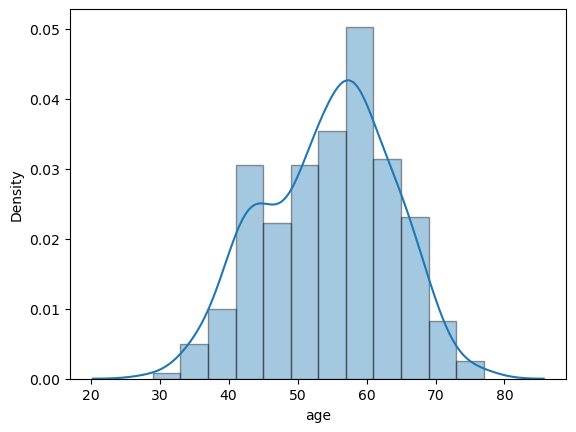

In [20]:
sns.distplot(df['age'], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<Axes: xlabel='trtbps', ylabel='Density'>

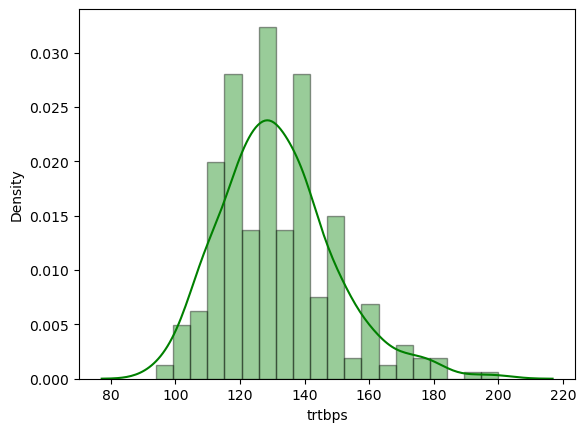

In [21]:
sns.distplot(df['trtbps'], hist_kws = dict(linewidth = 1, edgecolor = "k"), color = 'g', bins = 20)

<Axes: xlabel='chol', ylabel='Density'>

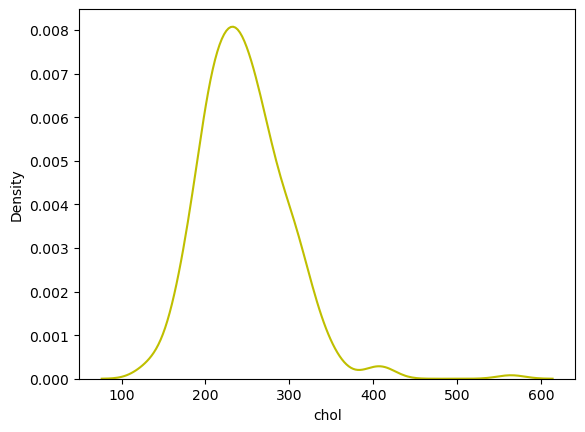

In [22]:
sns.distplot(df['chol'], hist= False, color = 'y')

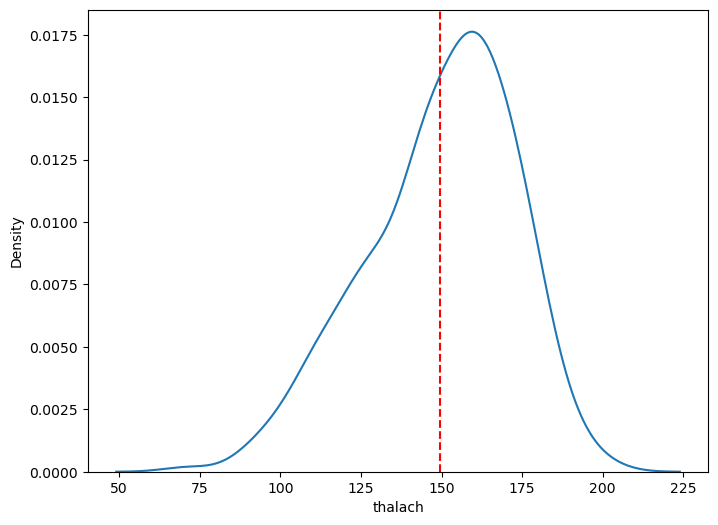

In [23]:
x, y = plt.subplots(figsize = (8,6))
sns.distplot(df['thalach'], hist= False, ax = y)
y.axvline(df['thalach'].mean(), color = 'r', ls = '--')

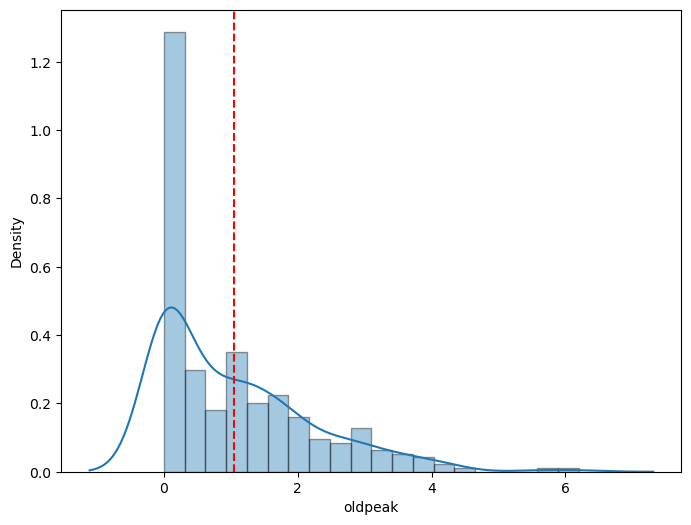

In [24]:
x, y = plt.subplots(figsize = (8,6))
sns.distplot(df['oldpeak'], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df['oldpeak'].mean(), color = 'r', ls = '--')


### 4. Exploratory Data Analysis(EDA) <a id = 17 ></a>


#### 4.1 Univariate Analysis <a id = 18 ></a>

#### 4.1.1  Numerical Variables(Analysis with **Distplot**) <a id = 19 ></a>


In [25]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [26]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure" ,  "Cholesterol", "Maxium Heart Rate Achieved", "ST Depression"]

In [27]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maxium Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

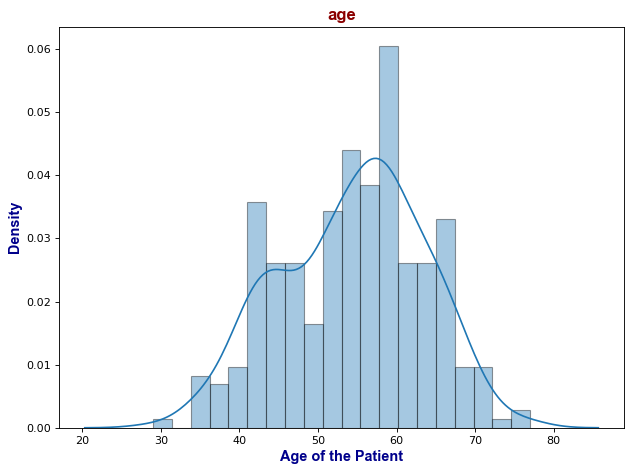

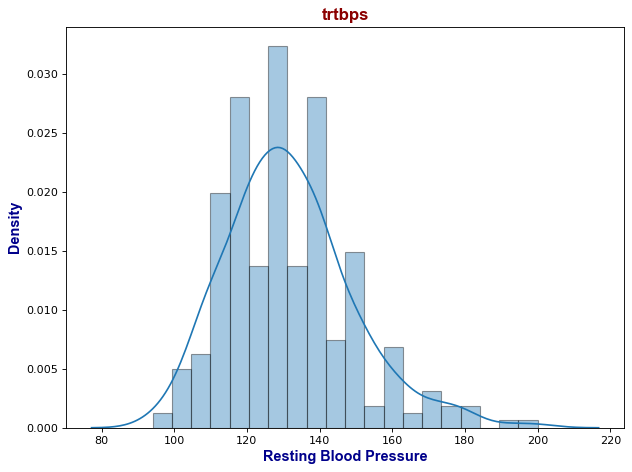

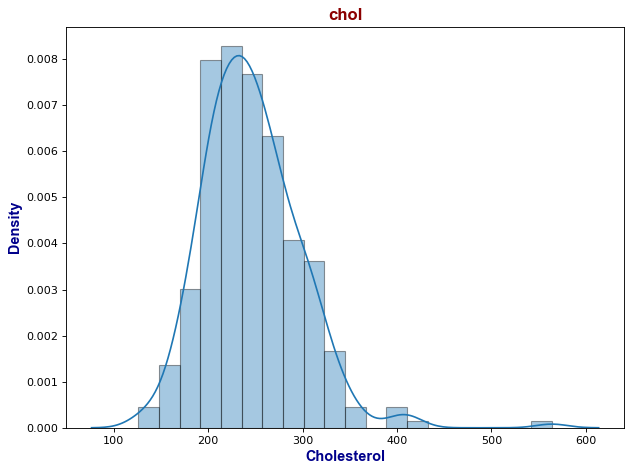

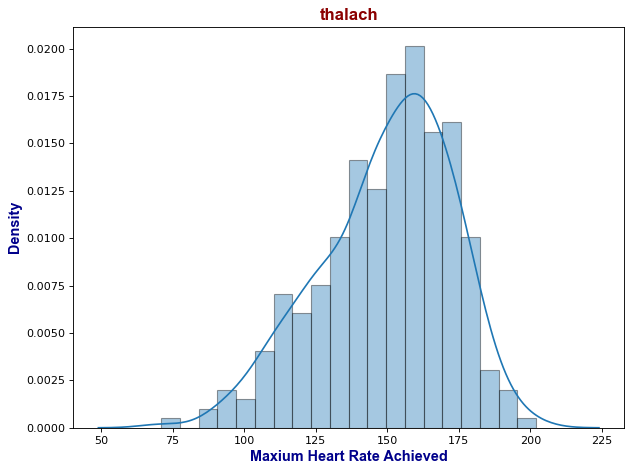

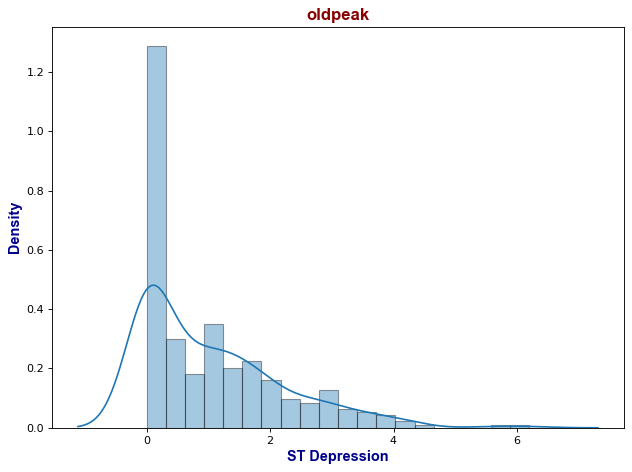

In [28]:
title_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size' : 15}
axis_font = {'family': 'arial', 'color':'darkblue', 'weight':'bold', 'size' : 13}


for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    plt.tight_layout()
    plt.show()

#### 4.1.1.1 Analysis Outputs(4) <a id = 20 ></a>


#### 4.1.2 Categorical Variables(Analysis with **Piechart**) <a id = 21 ></a>


In [29]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [30]:
categoric_axis_name = ['Gender','Cheat Pain Type','Fasting Blood Sugar',
                       'Resting Electrocardiographic Results',
                       'Exercise Induced Angina', 
                       'The Slope of ST Segment',
                      'Number of Major Vessels',
                      'Thal', 'Target']

In [31]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Cheat Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [32]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [33]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [34]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

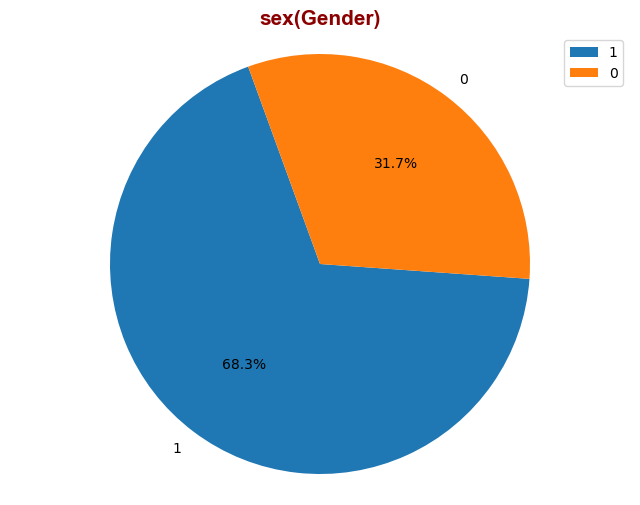

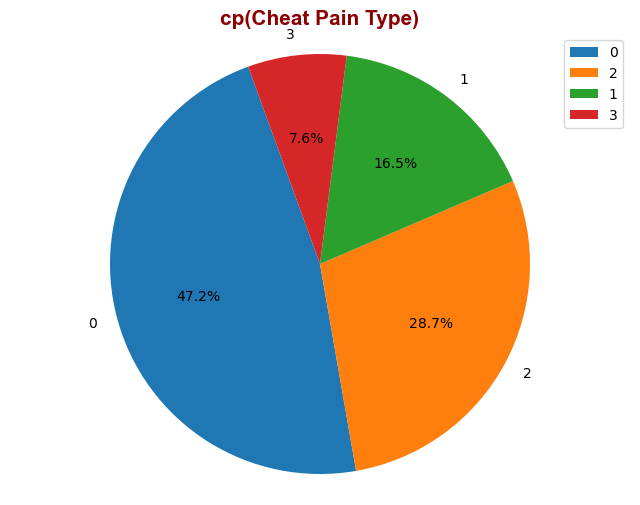

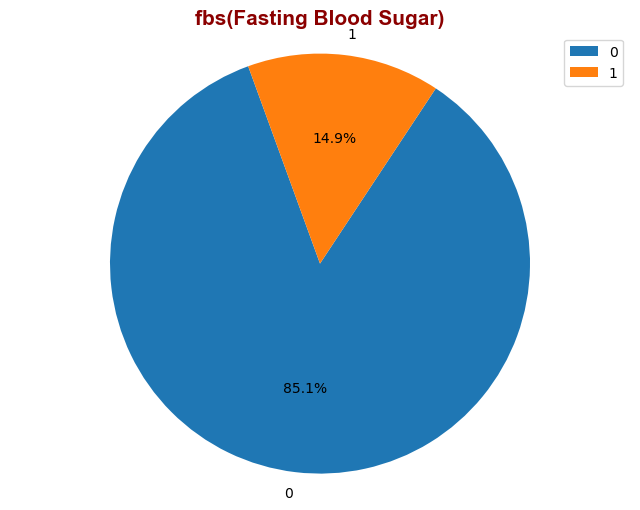

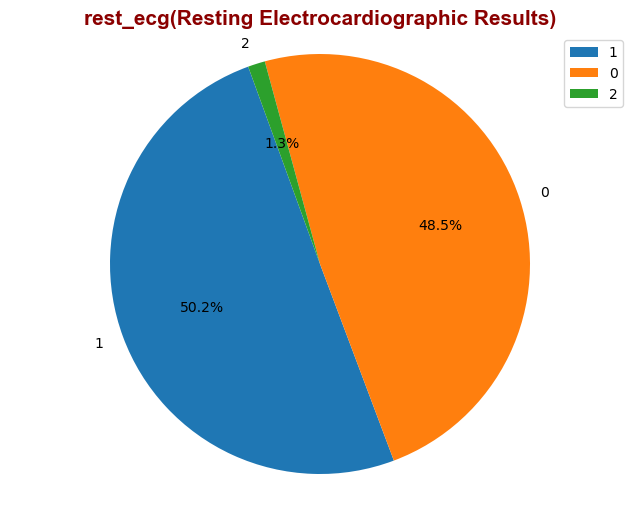

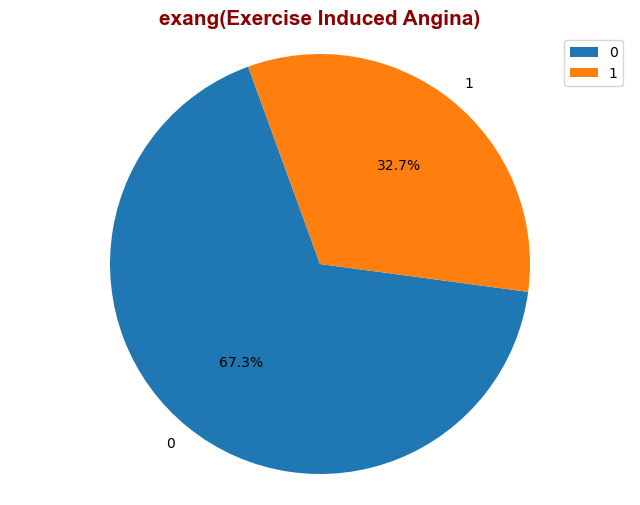

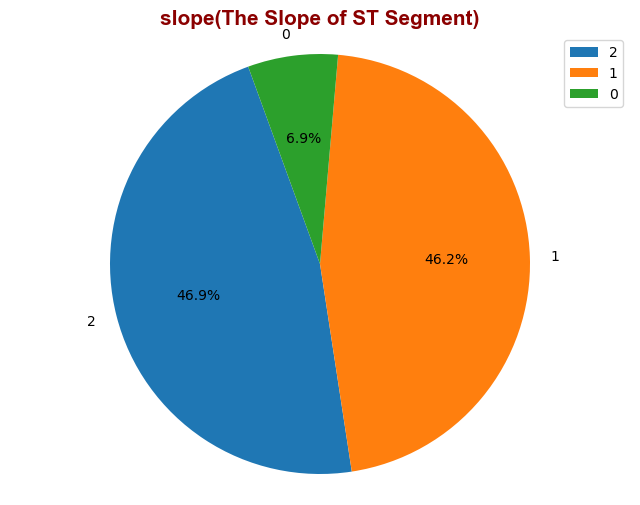

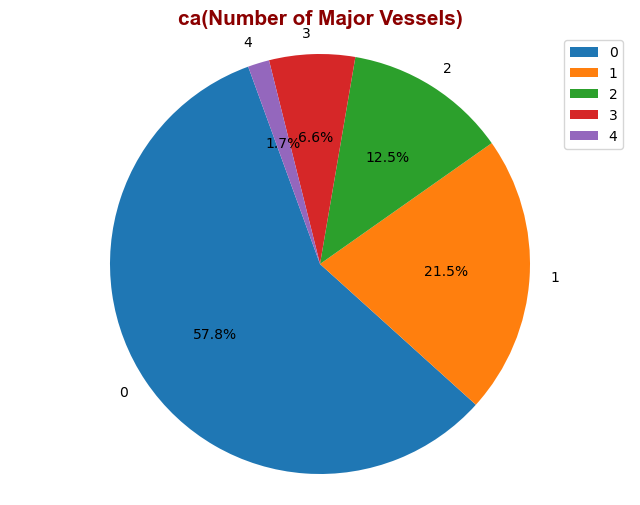

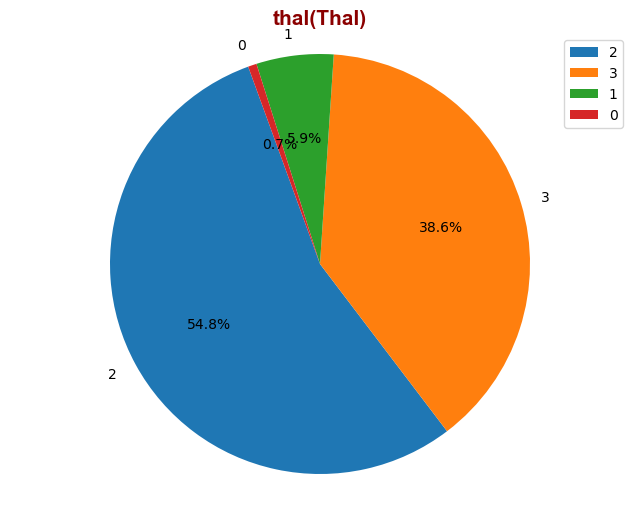

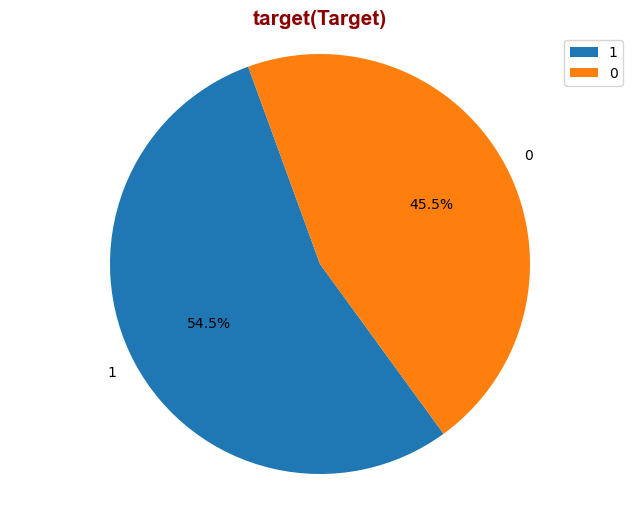

In [35]:
title_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size' : 15}
axis_font = {'family': 'arial', 'color':'darkblue', 'weight':'bold', 'size' : 13}


for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', startangle =110,
          labeldistance = 1.1)
    ax.axis("equal")
    plt.title((i + '(' + z + ')'), fontdict = title_font)
    plt.legend()
    plt.show()
    

In [36]:
df[df['thal'] ==0]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0

In [37]:
df['thal'] = df['thal'].replace(0, np.nan)

In [38]:
df.loc[[48,281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   NaN       1  
281      1   0   NaN       0

In [39]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         2
target                       0

In [40]:
df['thal'].fillna(2, inplace=True)

In [41]:
df.loc[[48,281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   2.0       1  
281      1   0   2.0       0

In [42]:
df['thal'] = pd.to_numeric(df['thal'], downcast = 'integer')

In [43]:
df

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
0     63    1   3     145   233    1         0      150      0      2.3   
1     37    1   2     130   250    0         1      187      0      3.5   
2     41    0   1     130   204    0         0      172      0      1.4   
3     56    1   1     120   236    0         1      178      0      0.8   
4     57    0   0     120   354    0         1      163      1      0.6   
..   ...  ...  ..     ...   ...  ...       ...      ...    ...      ...   
298   57    0   0     140   241    0         1      123      1      0.2   
299   45    1   3     110   264    0         1      132      0      1.2   
300   68    1   0     144   193    1         1      141      0      3.4   
301   57    1   0     130   131    0         1      115      1      1.2   
302   57    0   1     130   236    0         0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [44]:
df.loc[[48,281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     2       1  
281      1   0     2       0

In [45]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

In [46]:
df['thal'].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

#### 4.2. Bivariate Analysis <a id = 22 ></a>

#### 4.2.1 Numerical Variables - Target Variables(Analysis with **FaceGrid**) <a id = 23 ></a>

In [47]:
numeric_var.append('target')

In [48]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

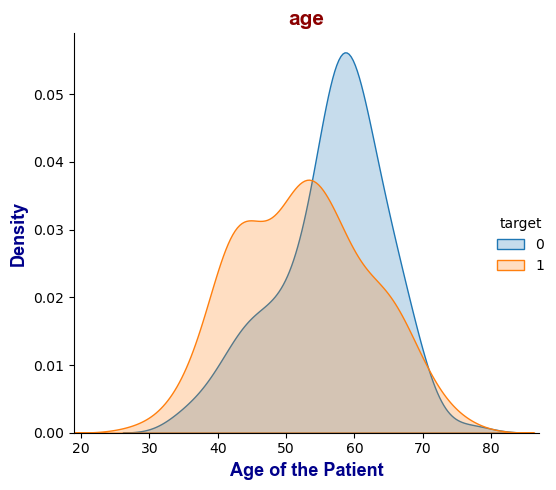

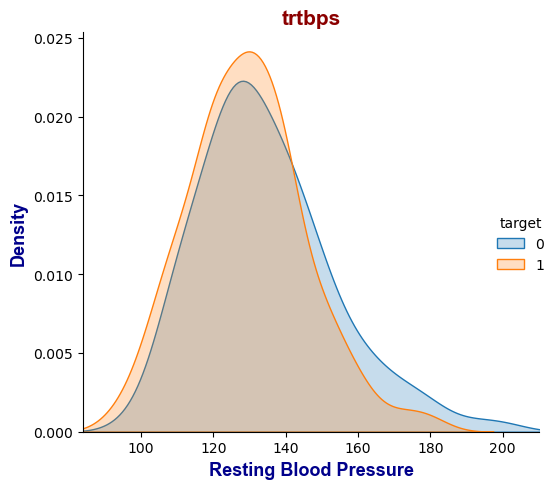

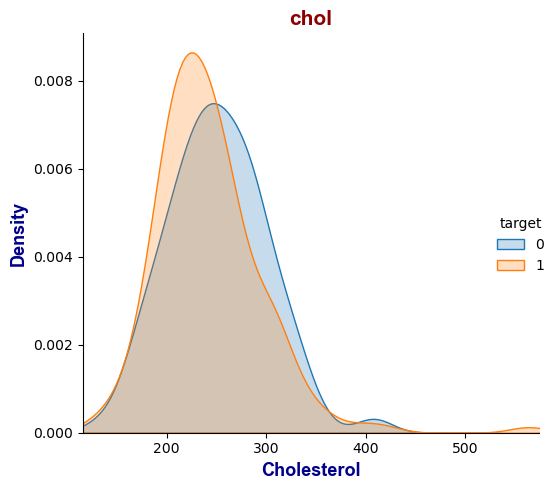

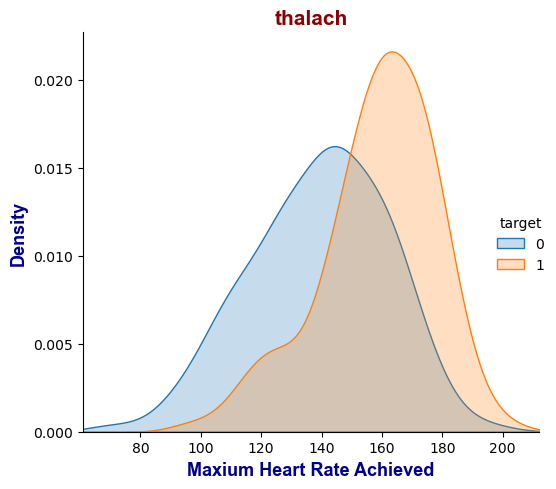

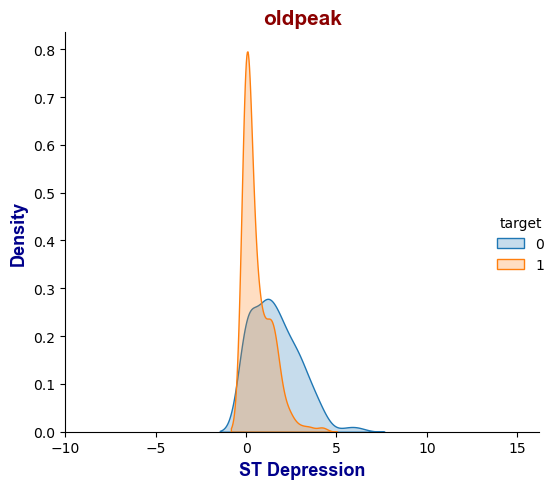

In [49]:
title_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size' : 15}
axis_font = {'family': 'arial', 'color':'darkblue', 'weight':'bold', 'size' : 13}


for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = 'target', height = 5, xlim = ((df[i].min() - 10, df[i].max() +10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    plt.tight_layout()
    plt.show()

In [50]:
df[numeric_var].corr()

age    trtbps      chol   thalach   oldpeak    target
age      1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trtbps   0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol     0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak  0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target  -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000

In [51]:
df[numeric_var].corr().iloc[:, -1]

age       -0.225439
trtbps    -0.144931
chol      -0.085239
thalach    0.421741
oldpeak   -0.430696
target     1.000000
Name: target, dtype: float64

#### 4.2.2 Categorical Variables - Target Variables(Analysis with CountPlot <a id = 24 ></a> (#24) 

In [52]:
# title_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size' : 15}
# axis_font = {'family': 'arial', 'color':'darkblue', 'weight':'bold', 'size' : 13}


# for i, z in list(zip(categoric_var, categoric_axis_name)):
#     plt.figure(figsize = (8,5))
#     sns.countplot(i, data = df[categoric_var], hue = "target")
    
#     plt.title(i + " - target",  fontdict = title_font)
#     plt.xlabel(z, fontdict = axis_font)
#     plt.ylabel("Target", fontdict = axis_font)
    
#     plt.tight_layout()
#     plt.show()

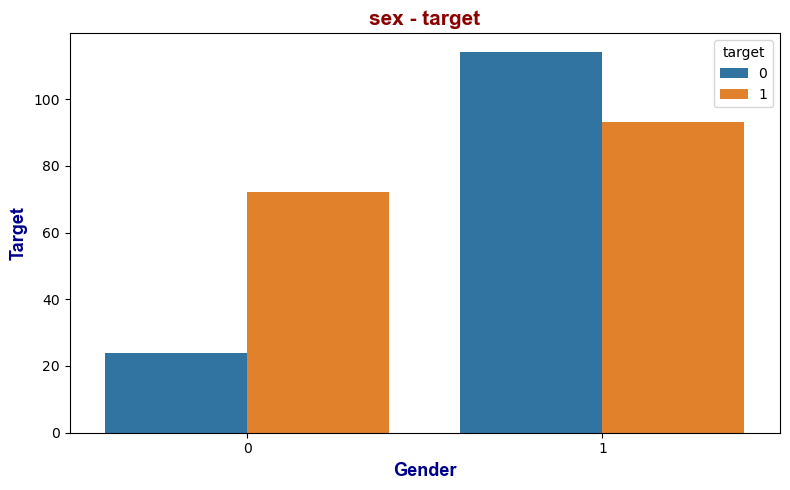

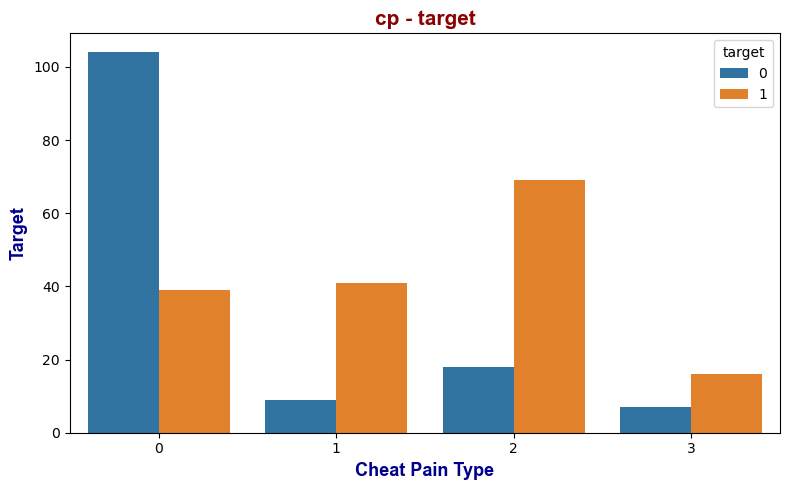

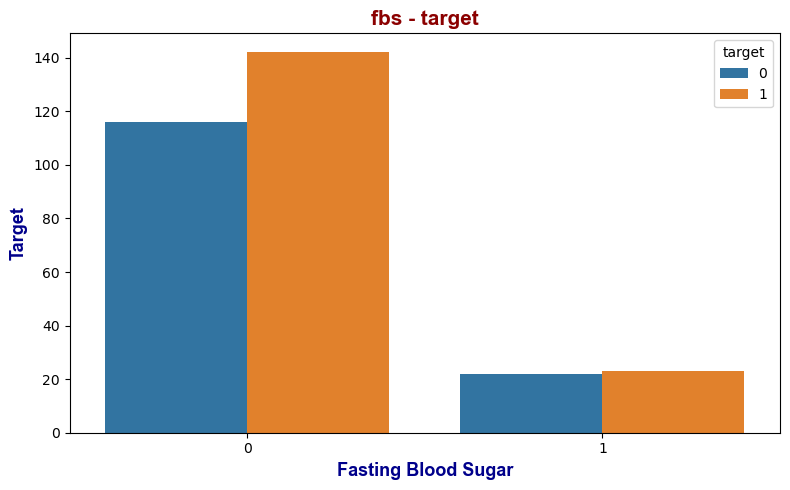

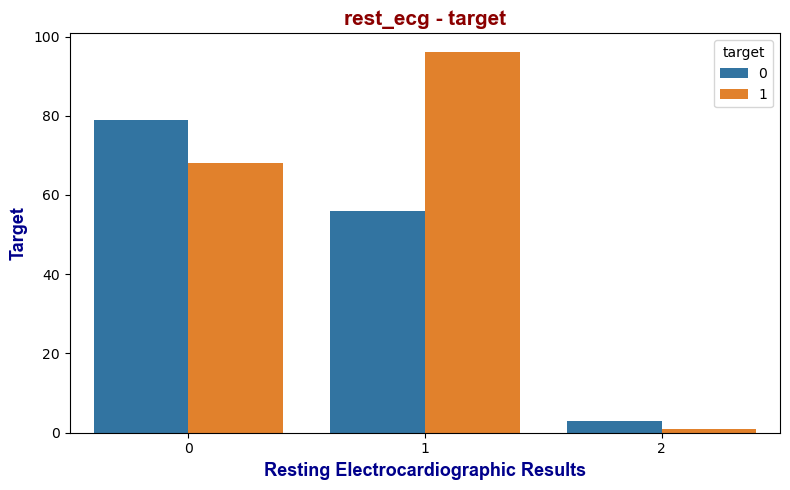

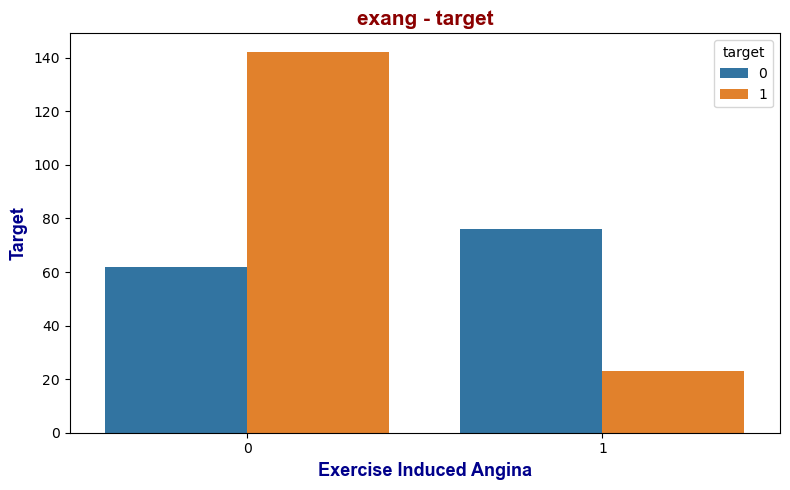

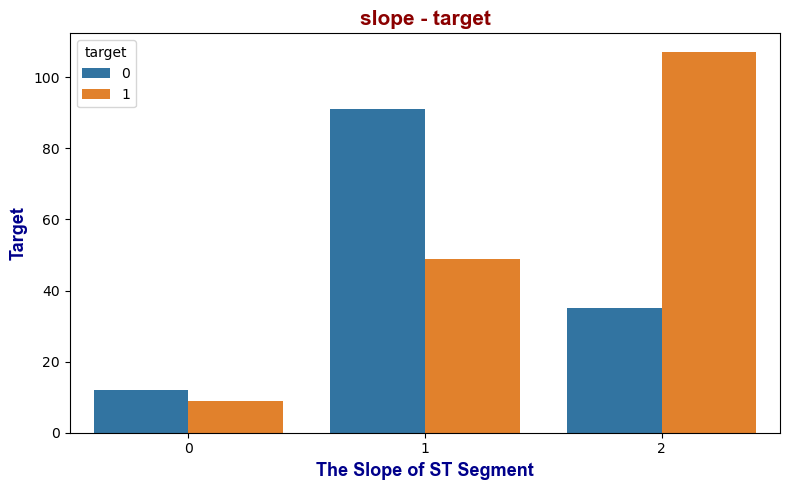

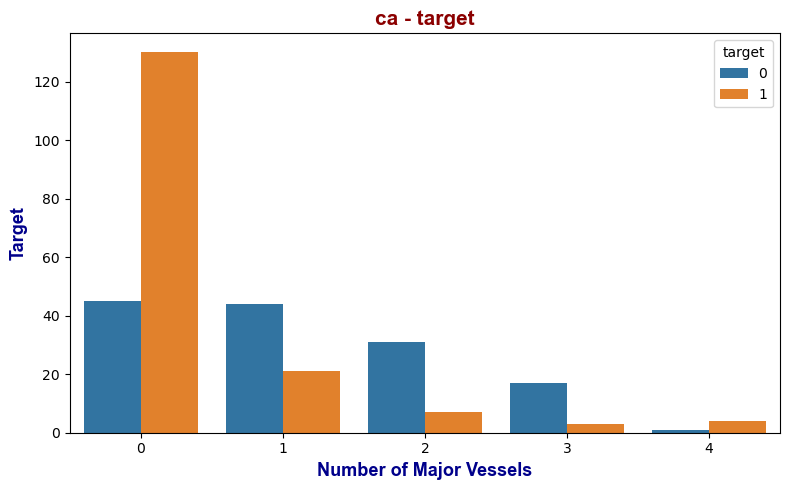

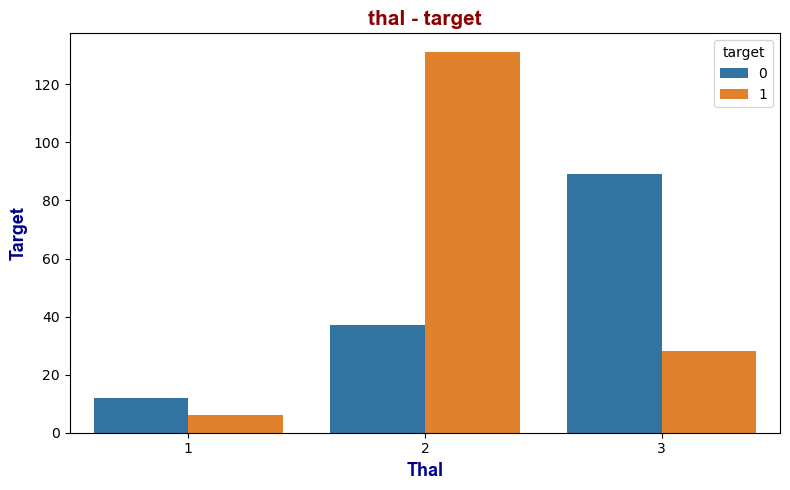

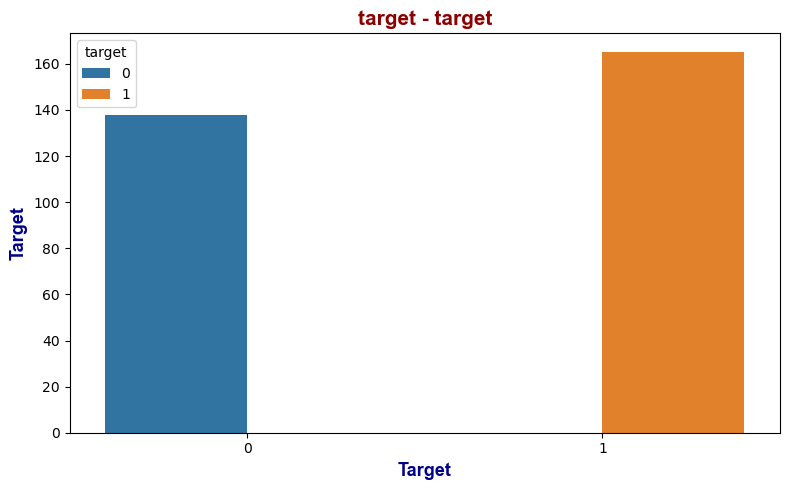

In [53]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
#     sns.countplot(i, data = df[categoric_var], hue = "target")
    sns.countplot(x=i, data=df[categoric_var], hue="target")

    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [54]:
df[categoric_var].corr()

sex        cp       fbs  rest_ecg     exang     slope  \
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711   
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
slope    -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
ca        0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155   
thal      0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

                ca      thal    target  
sex       0.118261  0.211652 -0.280937  
cp       -0.181053 -0.169125  0.433798  
fbs       0.137979 -0.011209 -0.028046  
rest_ecg -0.072042 -0.013795  0.137230  
exang     0.115739  0.225508 -0.436757  
slope    -0.080155 -0.106310  0.345877  
ca        1.000000  0.143248 -0.391724  
thal      0.143248  1.000000 -0.363322  
target   -0.391724 -0.363322  1.000000

In [55]:
df[categoric_var].corr().iloc[:, -1]

sex        -0.280937
cp          0.433798
fbs        -0.028046
rest_ecg    0.137230
exang      -0.436757
slope       0.345877
ca         -0.391724
thal       -0.363322
target      1.000000
Name: target, dtype: float64

#### 4.2.3 Examining Numeric Variables Among Themselves(Analysis with **PairPlot**)<a id = 25 ></a>

In [56]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [57]:
numeric_var.remove('target')

In [58]:
df[numeric_var].head()

age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

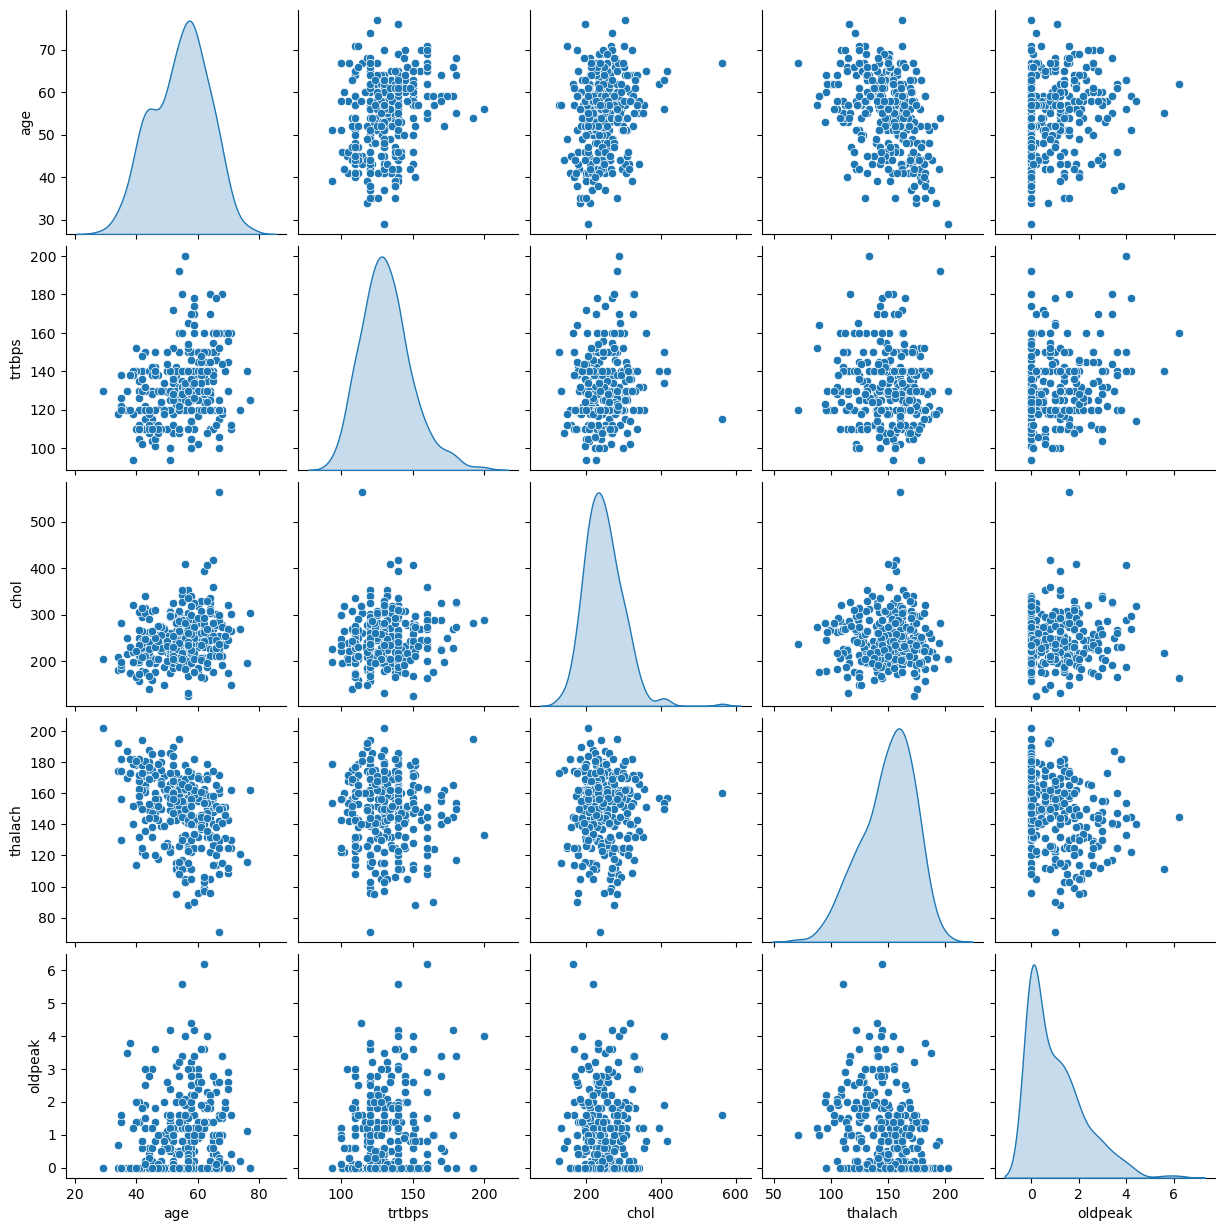

In [59]:
sns.pairplot(df[numeric_var], diag_kind = 'kde')

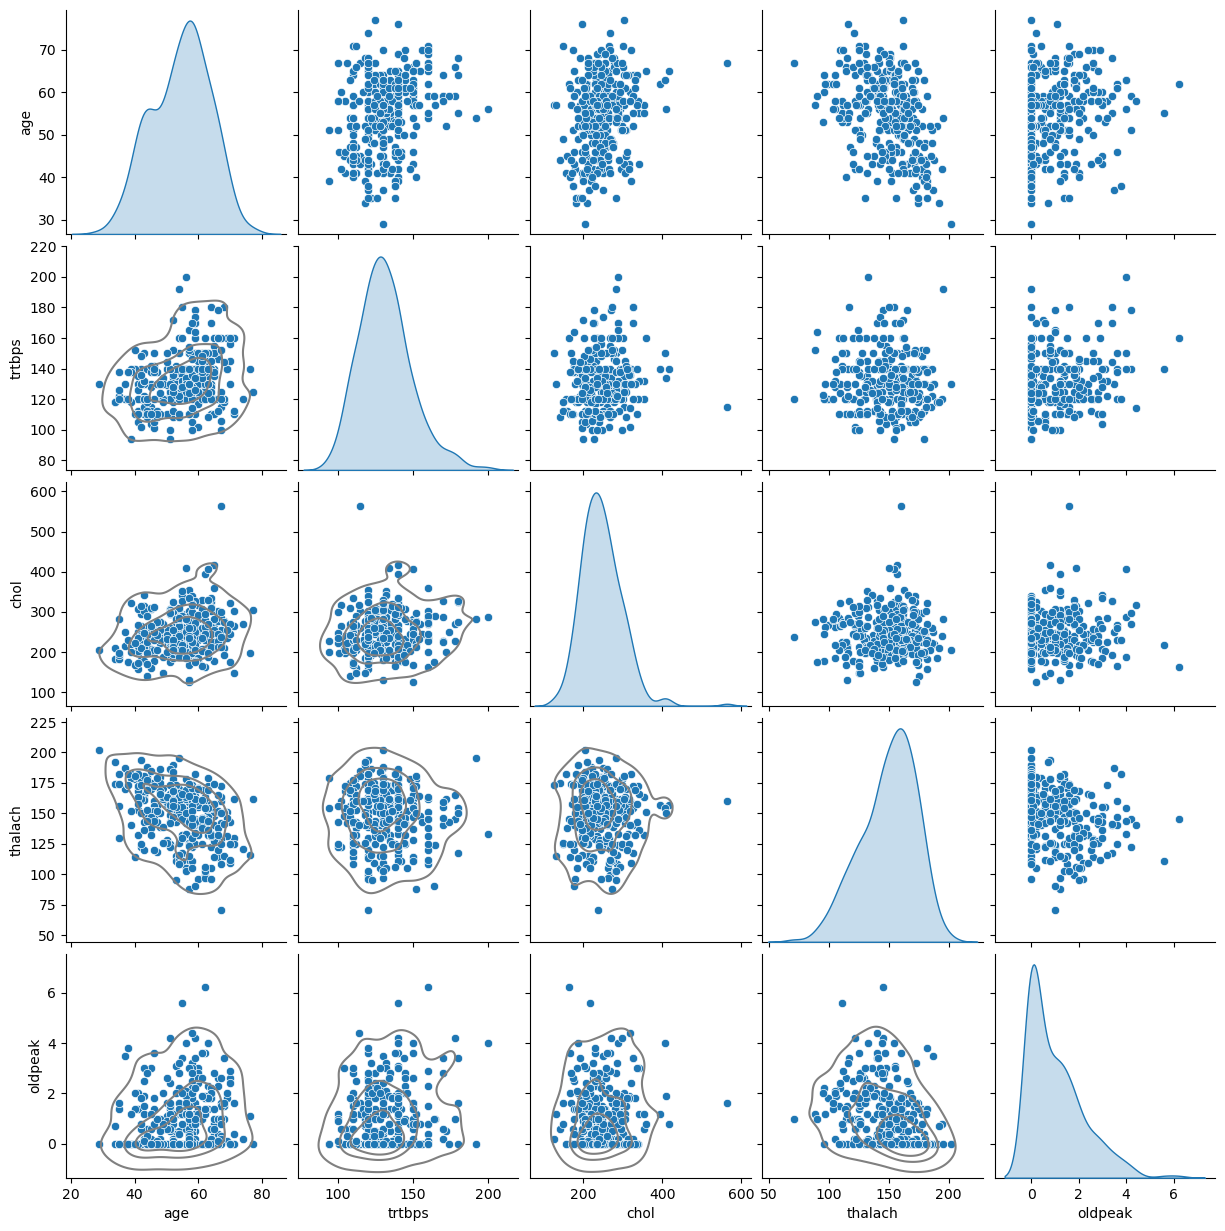

In [60]:
graph = sns.pairplot(df[numeric_var], diag_kind = 'kde')
graph.map_lower(sns.kdeplot, levels = 4, color = ".5")
plt.show()

#### 4.2.4 Feature Scaling with the RobustScaler Method <a id = 26 ></a>

In [61]:
from sklearn.preprocessing import RobustScaler

In [62]:
robust_scaler = RobustScaler()

In [63]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [64]:
scaled_data 

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [65]:
type(scaled_data)

numpy.ndarray

In [66]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

age  trtbps      chol   thalach  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

#### 4.2.5 Creating a New DataFrame with the Melt() Function <a id = 27 ></a>

In [67]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)

In [68]:
df_new.head()

age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [69]:
melted_data = pd.melt(df_new, id_vars = 'target', var_name = 'variables', value_name = 'value' )

In [70]:
melted_data

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

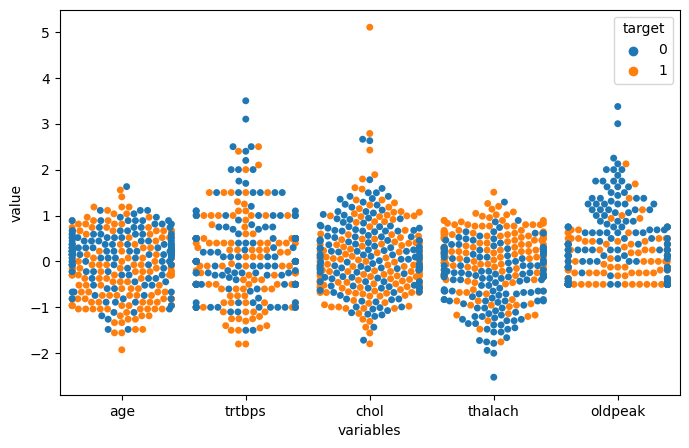

In [71]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = 'variables', y = 'value', hue= 'target', data = melted_data)
plt.show()

#### 4.2.6 Numerical Variables - Categorical Variables (Analysis with **Swarm Plot**)<a id = 28 ></a>


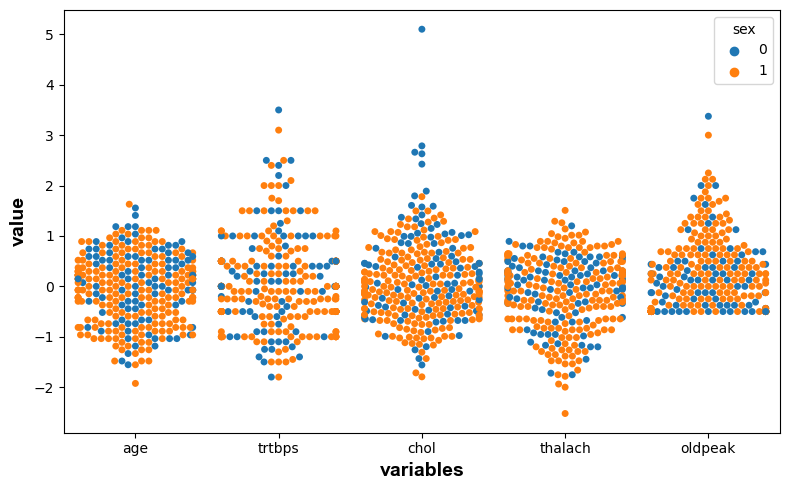

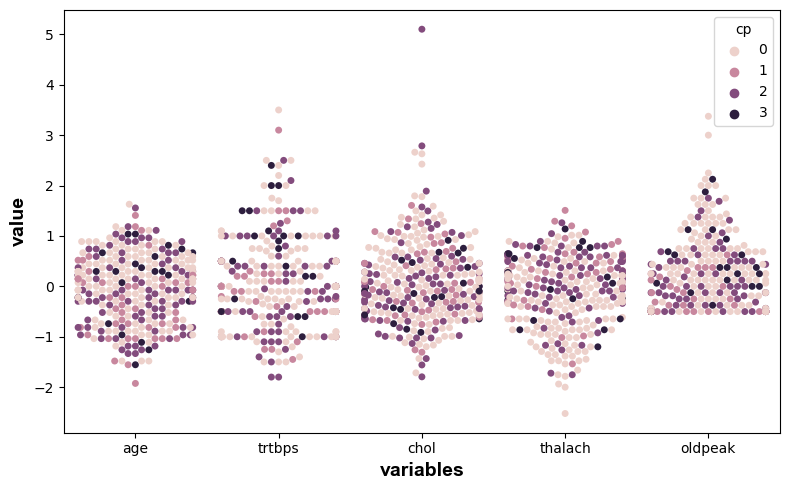

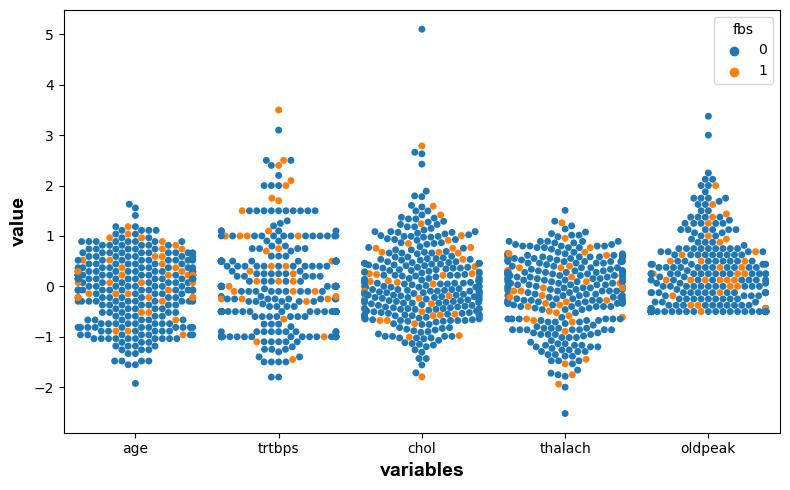

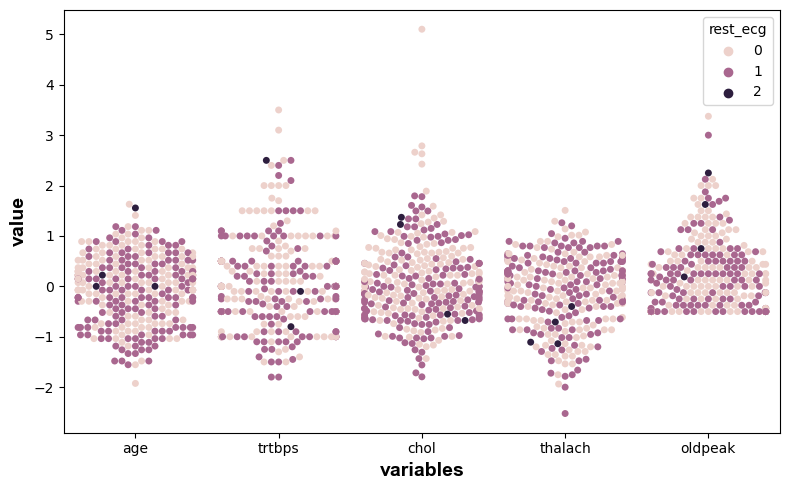

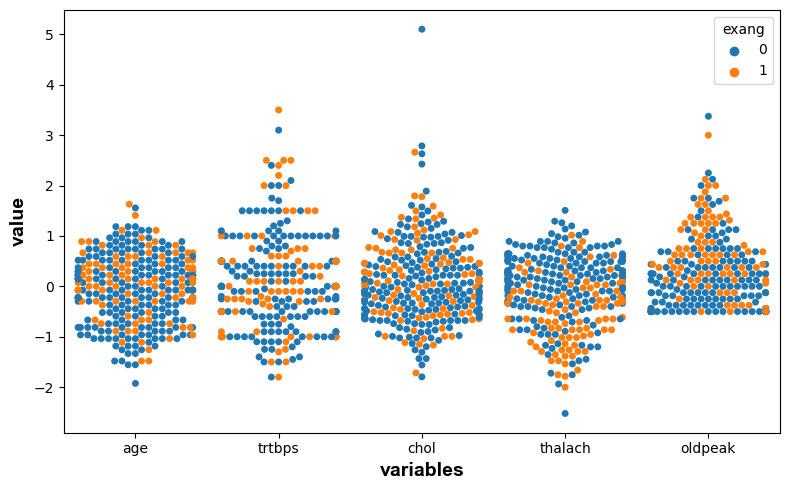

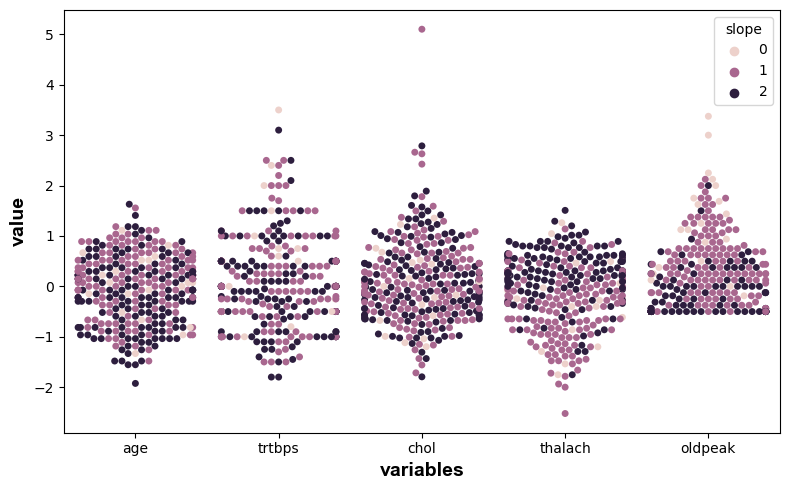

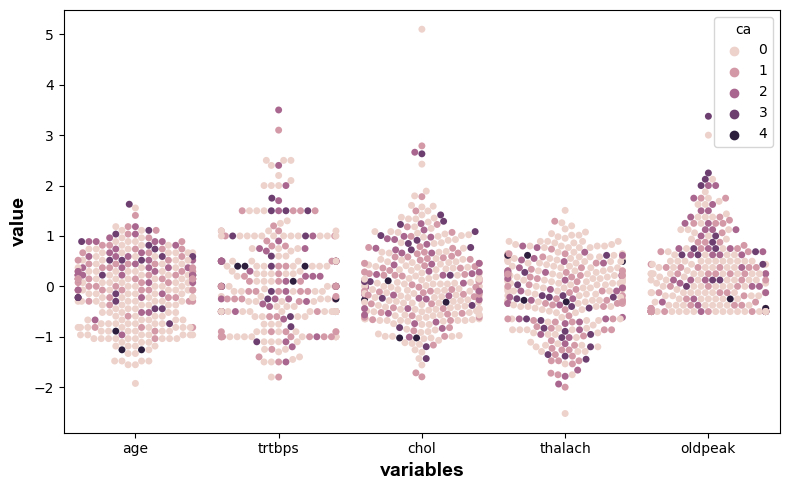

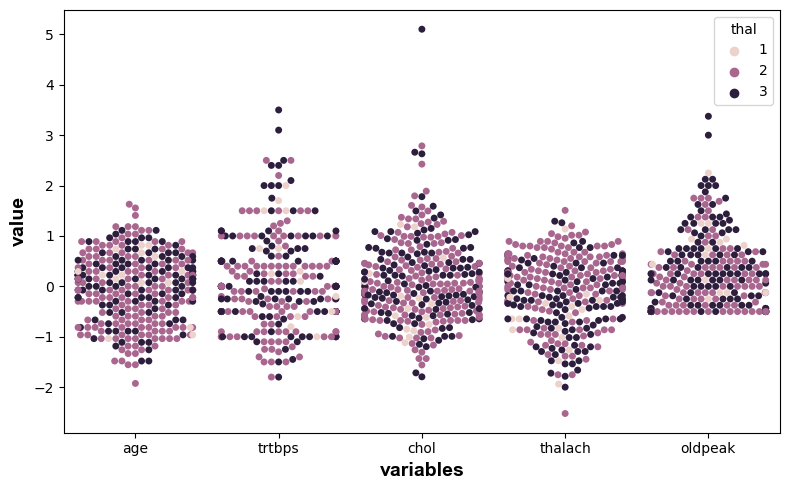

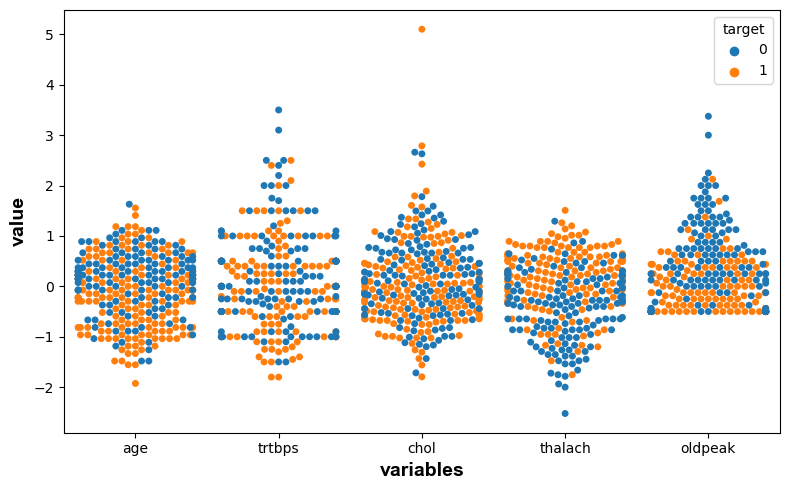

In [72]:
# title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}


for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = 'variables', value_name = 'value' )
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = 'variables', y = 'value', hue= i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()


#### 4.2.7 Numerical Variables - Categorical Variables (Analysis with **Box Plot**)<a id = 29 ></a>


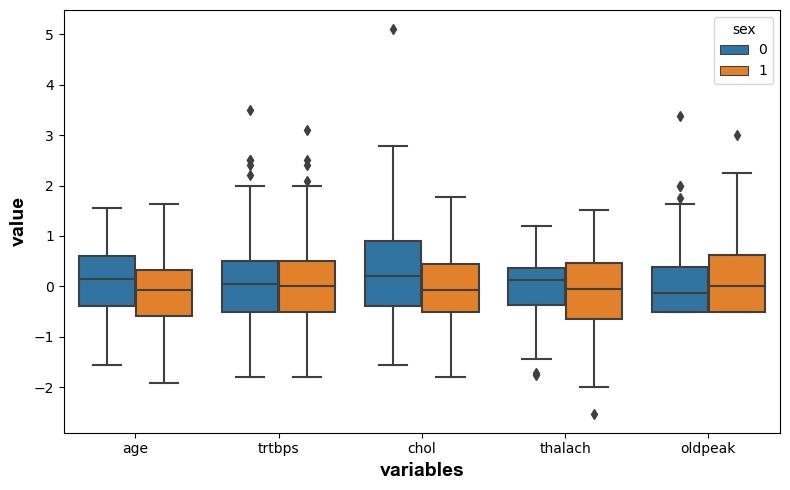

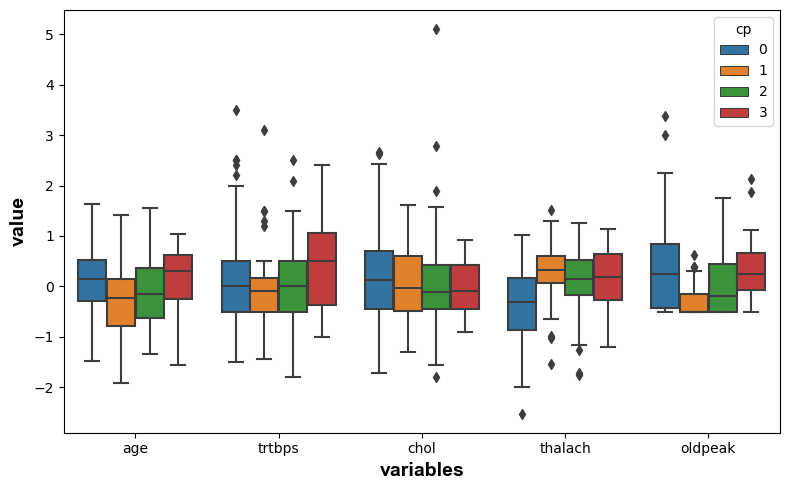

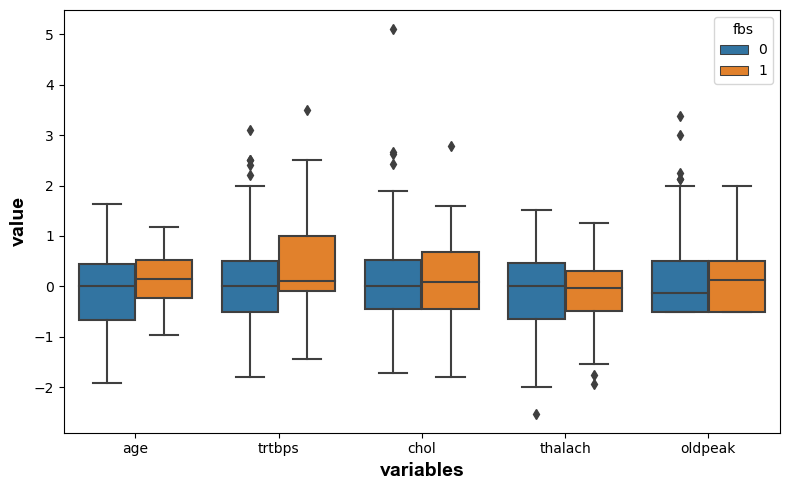

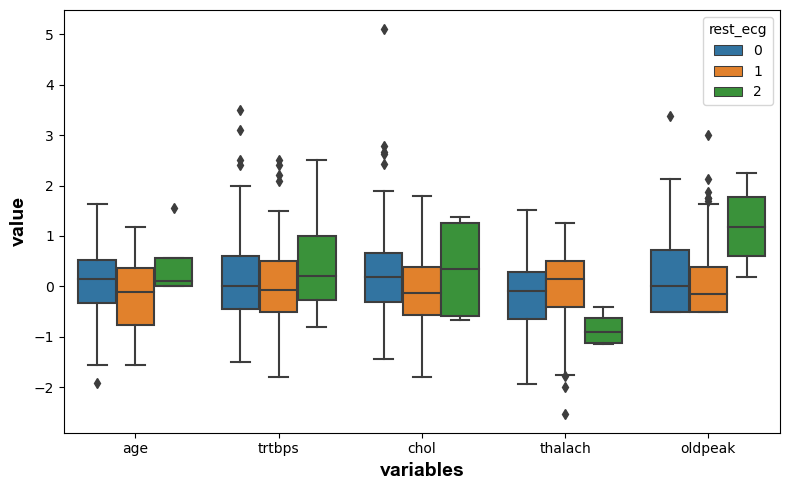

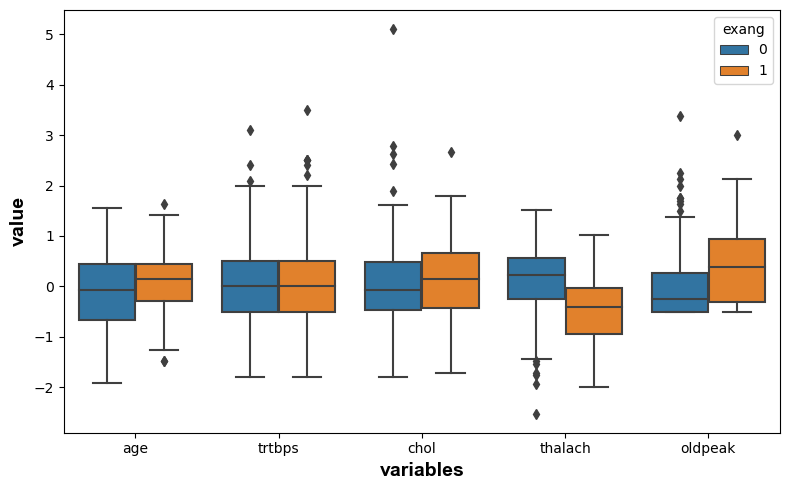

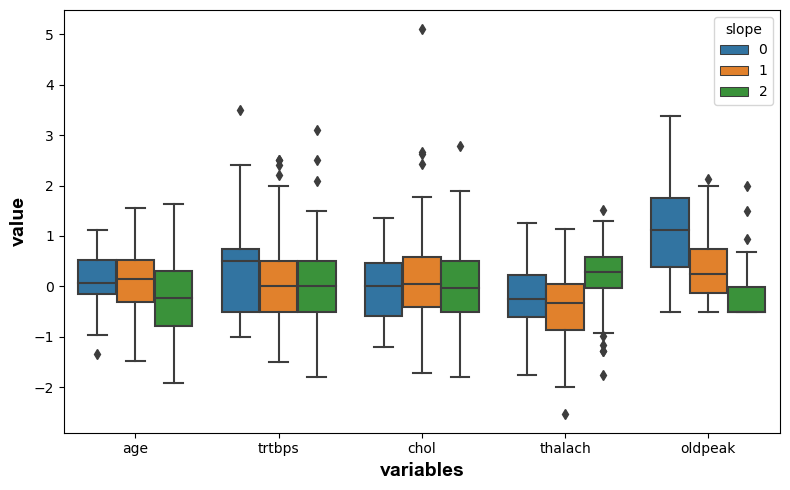

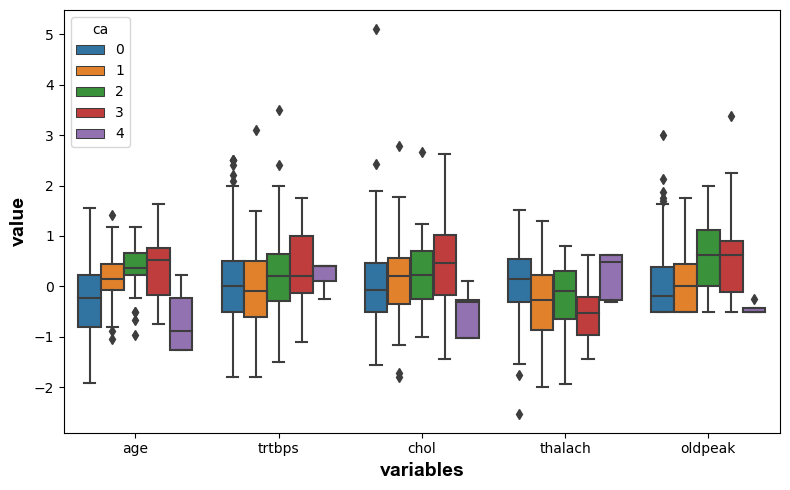

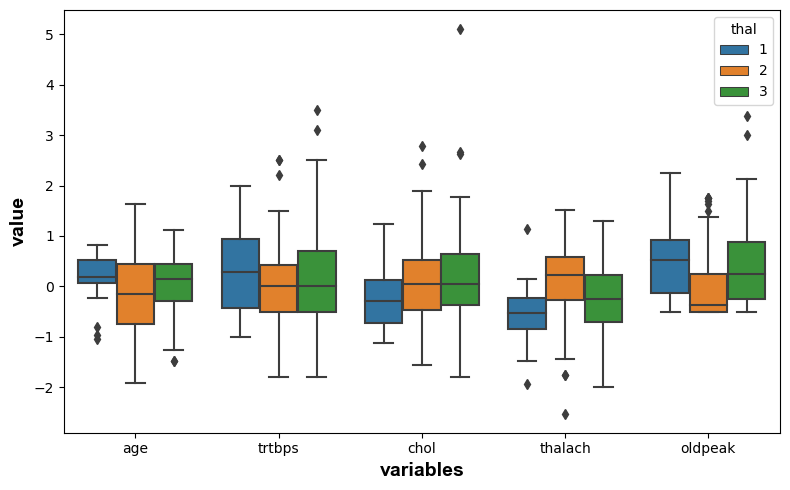

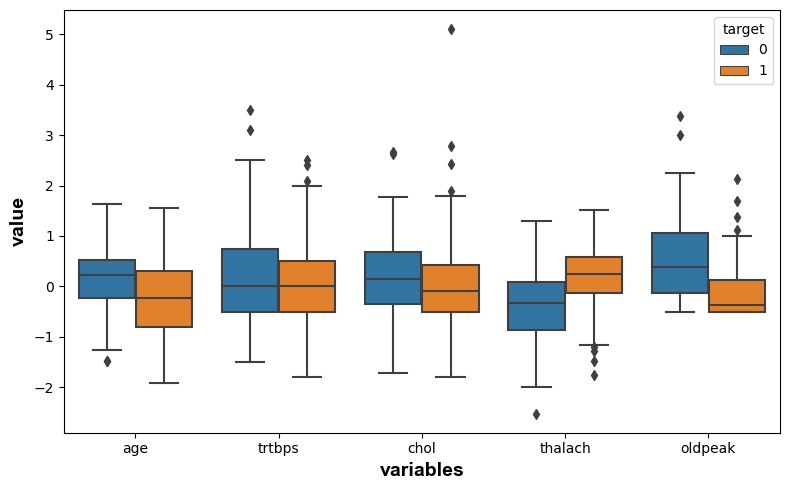

In [73]:
# title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}


for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = 'variables', value_name = 'value' )
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = 'variables', y = 'value', hue= i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### 4.2.8 Relationships between variables (Analysis with **Heatmap**) <a id = 30 ></a>

In [74]:
df_scaled

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [75]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)

In [76]:
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slope  ca  thal  target  
0        0      0   0     1       1  
1        0      0   0     2       1  
2        0      2   0     2       1  
3        0      2   0     2       1  
4        1      2   0     2       1  
..     ...    ...  ..   ...     ...  
298      1      1   0     3       0  
299      0      1   0     3       0  
300      0      1   2     3       0  
301      1      1   1     3       0  
302      0      1   1     2       0  

[303 rows x 14 columns]

In [77]:
df_new2.corr()

age    trtbps      chol   thalach   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
rest_ecg -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exang     0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slope    -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
ca        0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thal      0.066745  0.060638  0.087866 -0.115310  0.210236  0.211652   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs  rest_ecg     exang     slope        ca  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalach   0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
rest_ecg  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slope     0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thal     -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

              thal    target  
age       0.066745 -0.225439  
trtbps    0.060638 -0.144931  
chol      0.087866 -0.085239  
thalach  -0.115310  0.421741  
oldpeak   0.210236 -0.430696  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
rest_ecg -0.013795  0.137230  
exang     0.225508 -0.436757  
slope    -0.106310  0.345877  
ca        0.143248 -0.391724  
thal      1.000000 -0.363322  
target   -0.363322  1.000000

<Axes: >

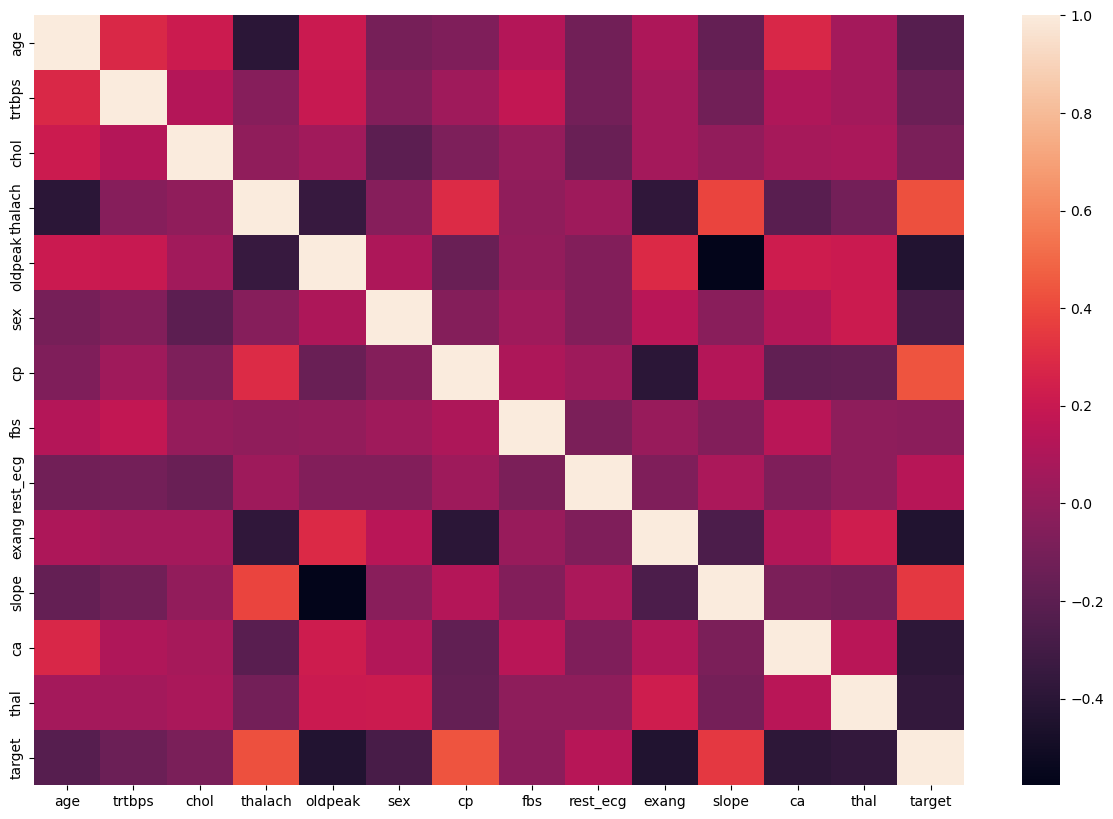

In [78]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_new2.corr())

<Axes: >

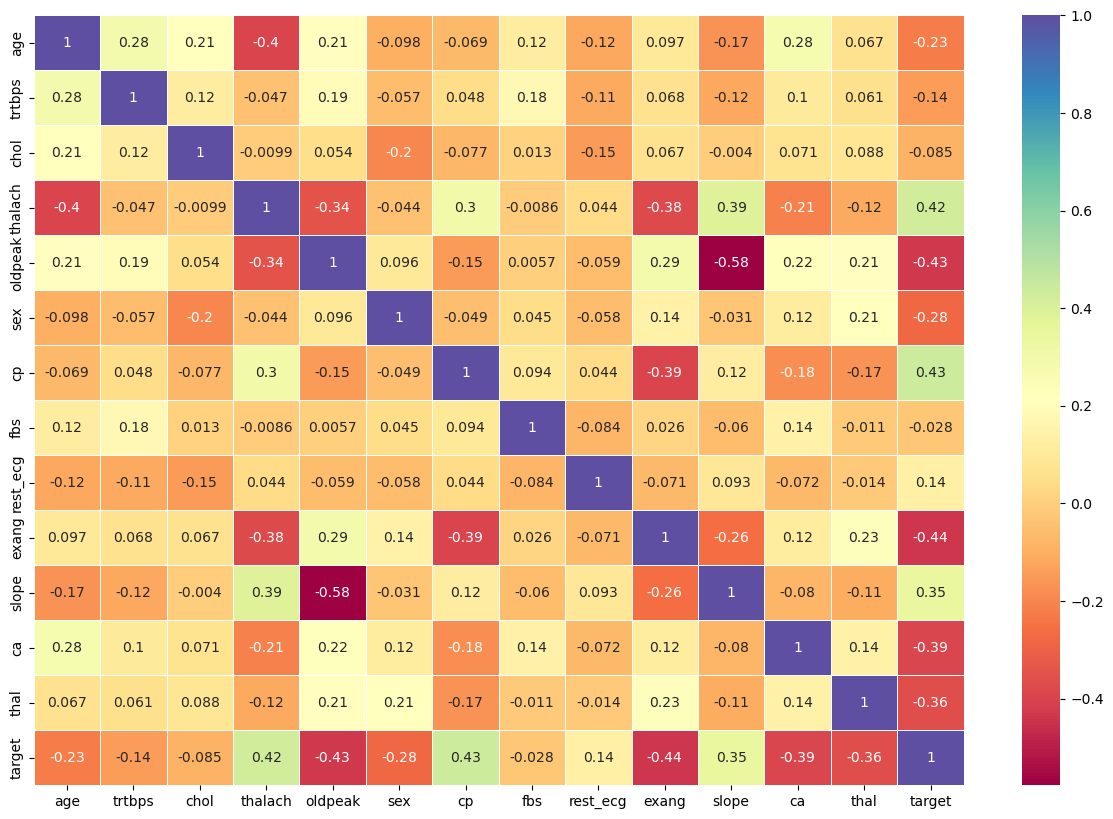

In [79]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df_new2.corr(), cmap= 'Spectral', annot = True, linewidth = 0.5)

### 5. Preparation for Modelling <a id = 31></a>


#### 5.1 Dropping columns with Low Correlation <a id=32></a>

In [80]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [81]:
df.drop(['chol', 'fbs', 'rest_ecg'], axis = 1)

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3     145      150      0      2.3      0   0     1       1
1     37    1   2     130      187      0      3.5      0   0     2       1
2     41    0   1     130      172      0      1.4      2   0     2       1
3     56    1   1     120      178      0      0.8      2   0     2       1
4     57    0   0     120      163      1      0.6      2   0     2       1
..   ...  ...  ..     ...      ...    ...      ...    ...  ..   ...     ...
298   57    0   0     140      123      1      0.2      1   0     3       0
299   45    1   3     110      132      0      1.2      1   0     3       0
300   68    1   0     144      141      0      3.4      1   2     3       0
301   57    1   0     130      115      1      1.2      1   1     3       0
302   57    0   1     130      174      0      0.0      1   1     2       0

[303 rows x 11 columns]

In [82]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [83]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

####  5.2 Struggling Outliers <a id=33></a>

#### 5.2.1  Visualizing outliers <a id = 34></a>

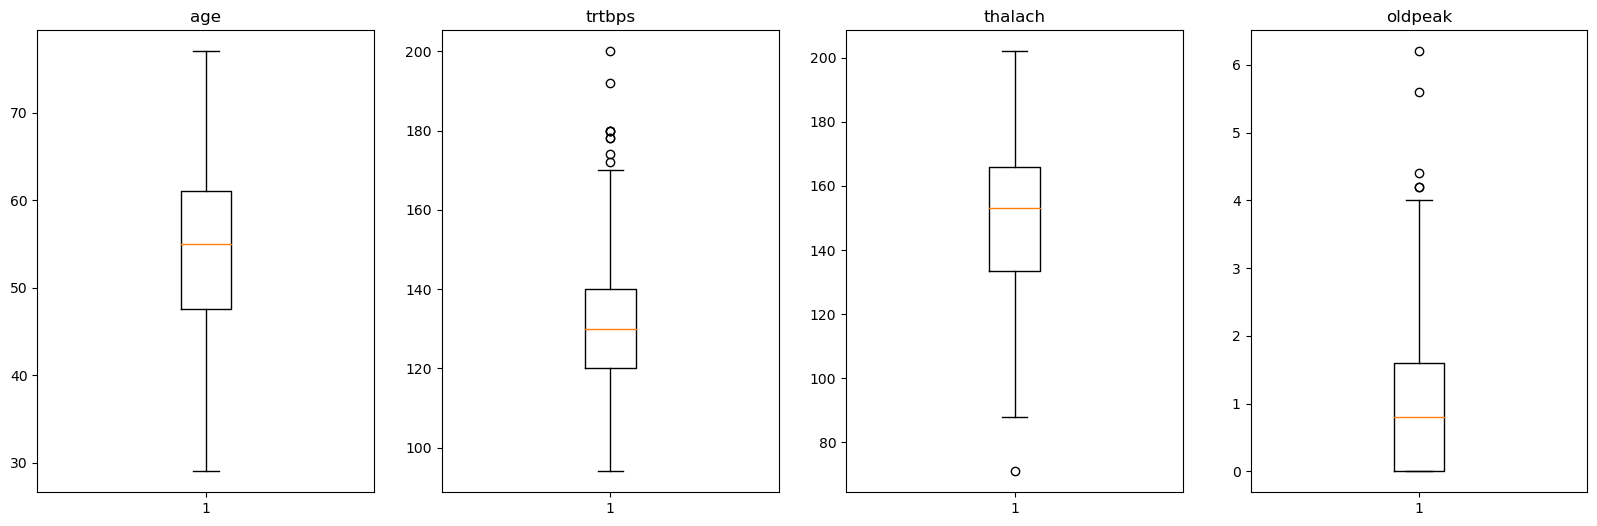

In [84]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6))
ax1.boxplot(df['age'])
ax1.set_title('age')

ax2.boxplot(df['trtbps'])
ax2.set_title('trtbps')

ax3.boxplot(df['thalach'])
ax3.set_title('thalach')

ax4.boxplot(df['oldpeak'])
ax4.set_title('oldpeak')

plt.show()

#### 5.2.2 Dealing with outliers <a id = 33></a>

#### 5.2.2.1 Trtbps Variable <a id = 34></a>

In [85]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [86]:
z_score_trtbps = zscore(df['trtbps'])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_score_trtbps > threshold)[0])))
    print("-----------------")
    
    

Threshold Value: 1
Number of Outliers: 51
-----------------
Threshold Value: 2
Number of Outliers: 13
-----------------
Threshold Value: 3
Number of Outliers: 2
-----------------


In [87]:
df[z_score_trtbps > 2]['trtbps']

8      172
101    178
110    180
152    170
195    170
203    180
223    200
228    170
241    174
248    192
260    178
266    180
292    170
Name: trtbps, dtype: int64

In [88]:
df[z_score_trtbps > 2].trtbps.min()

170

In [89]:
df[df['trtbps'] < 170].trtbps.max()

165

In [90]:
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [91]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [92]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

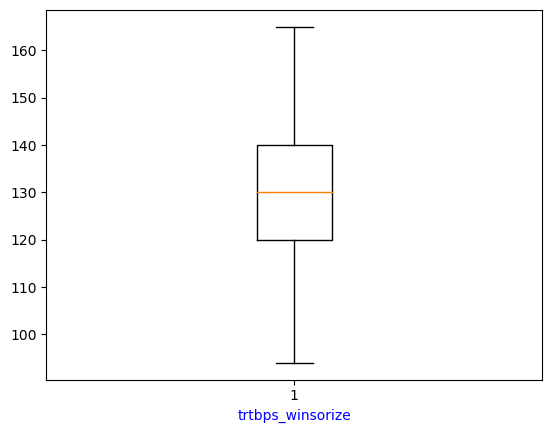

In [93]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [94]:
df['trtbps_winsorize'] = trtbps_winsorize

In [95]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  trtbps_winsorize  
0   0     1       1               145  
1   0     2       1               130  
2   0     2       1               130  
3   0     2       1               120  
4   0     2       1               120

#### 5.2.2.2 Thalach Variable <a id =#35></a>


In [96]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [97]:
thalach_out = iqr(df, 'thalach')

In [98]:
thalach_out

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
272   67    1   0     120   237    0         1       71      0      1.0   

     slope  ca  thal  target  trtbps_winsorize  
272      1   0     2       0               120

In [99]:
df.drop([272], axis = 0, inplace = True)

In [100]:
df['thalach'][270:275] # check that row has been dropped

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

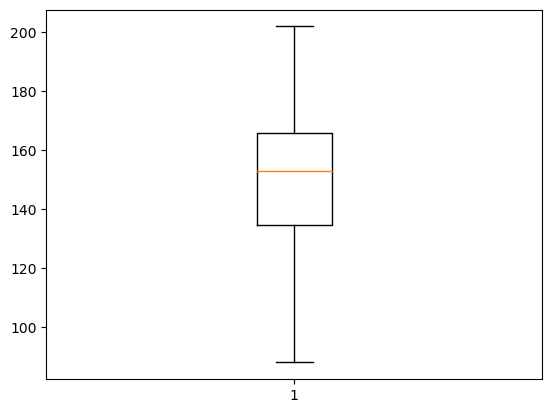

In [101]:
plt.boxplot(df['thalach']);  #semi colon removes the descriptive text of the code

#### 5.2.2.3 Oldpeak Variable <a id = 36></a> 

In [102]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [103]:
iqr(df, 'oldpeak')

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
101   59    1   3     178   270    0         0      145      0      4.2   
204   62    0   0     160   164    0         0      145      0      6.2   
221   55    1   0     140   217    0         1      111      1      5.6   
250   51    1   0     140   298    0         1      122      1      4.2   
291   58    1   0     114   318    0         2      140      0      4.4   

     slope  ca  thal  target  trtbps_winsorize  
101      0   0     3       1               165  
204      0   3     3       0               160  
221      0   0     3       0               140  
250      1   3     3       0               140  
291      0   3     1       0               114

In [104]:
df[df['oldpeak'] < 4.2].oldpeak.max()

4.0

In [105]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df['oldpeak'], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [106]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

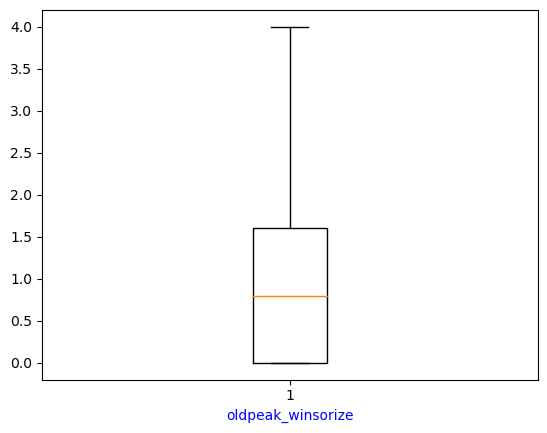

In [107]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel('oldpeak_winsorize', color = 'b')
plt.show()

In [108]:
df['oldpeak_winsorize'] = oldpeak_winsorize

In [109]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  trtbps_winsorize  oldpeak_winsorize  
0   0     1       1               145                2.3  
1   0     2       1               130                3.5  
2   0     2       1               130                1.4  
3   0     2       1               120                0.8  
4   0     2       1               120                0.6

In [110]:
df.drop(['trtbps', 'oldpeak'], axis = 1, inplace = True)

In [111]:
df.head()

age  sex  cp  chol  fbs  rest_ecg  thalach  exang  slope  ca  thal  target  \
0   63    1   3   233    1         0      150      0      0   0     1       1   
1   37    1   2   250    0         1      187      0      0   0     2       1   
2   41    0   1   204    0         0      172      0      2   0     2       1   
3   56    1   1   236    0         1      178      0      2   0     2       1   
4   57    0   0   354    0         1      163      1      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize  
0               145                2.3  
1               130                3.5  
2               130                1.4  
3               120                0.8  
4               120                0.6

#### 5.3 Determining Distributions of Numeric Variables <a id = 37></a>

37

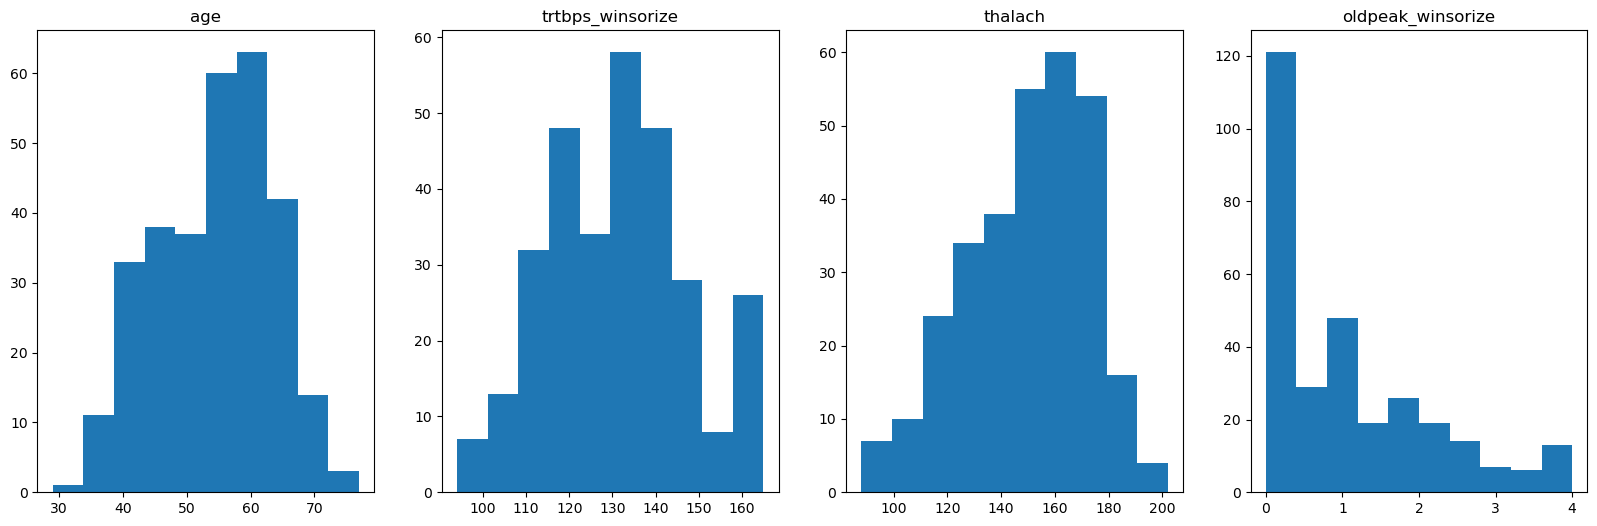

In [112]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6))
ax1.hist(df['age'])
ax1.set_title('age')

ax2.hist(df['trtbps_winsorize'])
ax2.set_title('trtbps_winsorize')

ax3.hist(df['thalach'])
ax3.set_title('thalach')

ax4.hist(df['oldpeak_winsorize'])
ax4.set_title('oldpeak_winsorize')

plt.show()

In [113]:
df[['age', 'trtbps_winsorize', 'thalach', 'oldpeak_winsorize']].agg(['skew']).transpose()

# these are skewness values of numerical varaibales. 


# it is between -0.5 and 0.5. Almost symmetrical distribution.

# Now, if it's between -0.5 and -1.0 or between 0.5 and 1.0, 
# there is moderately skewed distribution.

# But if it's any greater than -1.0 through 1.0, you can see that that variable 
# would have a very skewed distribution.

skew
age               -0.199209
trtbps_winsorize   0.251969
thalach           -0.461611
oldpeak_winsorize  0.996036

#### 5.4 Transformation Operations on Unsymmetrical Data <a id = 38></a>

In [114]:
df['oldpeak_winsorize_log'] = np.log(df['oldpeak_winsorize'])
df['oldpeak_winsorize_sqrt'] = np.sqrt(df['oldpeak_winsorize'])

In [115]:
df.head()

age  sex  cp  chol  fbs  rest_ecg  thalach  exang  slope  ca  thal  target  \
0   63    1   3   233    1         0      150      0      0   0     1       1   
1   37    1   2   250    0         1      187      0      0   0     2       1   
2   41    0   1   204    0         0      172      0      2   0     2       1   
3   56    1   1   236    0         1      178      0      2   0     2       1   
4   57    0   0   354    0         1      163      1      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize  oldpeak_winsorize_log  \
0               145                2.3               0.832909   
1               130                3.5               1.252763   
2               130                1.4               0.336472   
3               120                0.8              -0.223144   
4               120                0.6              -0.510826   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

In [116]:
df[['oldpeak_winsorize', 'oldpeak_winsorize_sqrt','oldpeak_winsorize_log' ]].agg(['skew']).transpose()

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_sqrt  0.108926
oldpeak_winsorize_log        NaN

In [117]:
df.drop(['oldpeak_winsorize', 'oldpeak_winsorize_log'], axis = 1, inplace = True)

In [118]:
df.head()

age  sex  cp  chol  fbs  rest_ecg  thalach  exang  slope  ca  thal  target  \
0   63    1   3   233    1         0      150      0      0   0     1       1   
1   37    1   2   250    0         1      187      0      0   0     2       1   
2   41    0   1   204    0         0      172      0      2   0     2       1   
3   56    1   1   236    0         1      178      0      2   0     2       1   
4   57    0   0   354    0         1      163      1      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize_sqrt  
0               145                1.516575  
1               130                1.870829  
2               130                1.183216  
3               120                0.894427  
4               120                0.774597

#### 5.5 Applying One Hot Encoding Method to Categorical Variables <a id = 39></a>

In [119]:
df_copy = df.copy()

In [120]:
df_copy.head()

age  sex  cp  chol  fbs  rest_ecg  thalach  exang  slope  ca  thal  target  \
0   63    1   3   233    1         0      150      0      0   0     1       1   
1   37    1   2   250    0         1      187      0      0   0     2       1   
2   41    0   1   204    0         0      172      0      2   0     2       1   
3   56    1   1   236    0         1      178      0      2   0     2       1   
4   57    0   0   354    0         1      163      1      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize_sqrt  
0               145                1.516575  
1               130                1.870829  
2               130                1.183216  
3               120                0.894427  
4               120                0.774597

In [121]:
cols_to_drop = ['fbs', 'rest_ecg']

df_copy = df_copy.drop(columns=cols_to_drop)

In [122]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     302 non-null    int64  
 1   sex                     302 non-null    int64  
 2   cp                      302 non-null    int64  
 3   chol                    302 non-null    int64  
 4   thalach                 302 non-null    int64  
 5   exang                   302 non-null    int64  
 6   slope                   302 non-null    int64  
 7   ca                      302 non-null    int64  
 8   thal                    302 non-null    int8   
 9   target                  302 non-null    int64  
 10  trtbps_winsorize        302 non-null    int64  
 11  oldpeak_winsorize_sqrt  302 non-null    float64
dtypes: float64(1), int64(10), int8(1)
memory usage: 28.6 KB


In [123]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [124]:
categoric_var.remove('fbs')
categoric_var.remove('rest_ecg')

In [125]:
cols_to_convert = categoric_var
df_copy[cols_to_convert] = df_copy[cols_to_convert].astype('category')

In [126]:
# df_copy = pd.get_dummies(df_copy, columns = categoric_var[: -1], drop_first = True)
df_copy = pd.get_dummies(df_copy, columns=categoric_var[:-1], drop_first = True)
# df_dummies = pd.get_dummies(df, columns=categoric_var, drop_first=True)


In [127]:
df_copy.head()

age  chol  thalach target  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63   233      150      1               145                1.516575   True   
1   37   250      187      1               130                1.870829   True   
2   41   204      172      1               130                1.183216  False   
3   56   236      178      1               120                0.894427   True   
4   57   354      163      1               120                0.774597  False   

    cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0  False  False   True    False    False    False  False  False  False  False   
1  False   True  False    False    False    False  False  False  False  False   
2   True  False  False    False    False     True  False  False  False  False   
3   True  False  False    False    False     True  False  False  False  False   
4  False  False  False     True    False     True  False  False  False  False   

   thal_2  thal_3  
0   False   False  
1    True   False  
2    True   False  
3    True   False  
4    True   False

In [128]:
cols_to_int = ['sex_1', 'cp_1', 'cp_2', 'cp_3', 'exang_1', 'slope_1',
               'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
               'thal_2', 'thal_3']  # Replace with your actual column names

#                  sex_1                   302 non-null    int64
#  7   cp_1                    302 non-null    int64
#  8   cp_2                    302 non-null    int64
#  9   cp_3                    302 non-null    int64
#  10  exang_1                 302 non-null    int64
#  11  slope_1                 302 non-null    int64
#  12  slope_2                 302 non-null    int64
#  13  ca_1                    302 non-null    int64
#  14  ca_2                    302 non-null    int64
#  15  ca_3                    302 non-null    int64
#  16  ca_4                    302 non-null    int64
#  17  thal_2                  302 non-null    int64
#  18  thal_3   
#                df_copy = df_copy.astype(int)
# Convert specified columns to 'int' type
df_copy[cols_to_int] = df_copy[cols_to_int].astype(int)

In [129]:
df_copy.head()
# df_copy.isnull().sum()

age  chol  thalach target  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63   233      150      1               145                1.516575      1   
1   37   250      187      1               130                1.870829      1   
2   41   204      172      1               130                1.183216      0   
3   56   236      178      1               120                0.894427      1   
4   57   354      163      1               120                0.774597      0   

   cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
0     0     0     1        0        0        0     0     0     0     0   
1     0     1     0        0        0        0     0     0     0     0   
2     1     0     0        0        0        1     0     0     0     0   
3     1     0     0        0        0        1     0     0     0     0   
4     0     0     0        1        0        1     0     0     0     0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0

In [130]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     302 non-null    int64   
 1   chol                    302 non-null    int64   
 2   thalach                 302 non-null    int64   
 3   target                  302 non-null    category
 4   trtbps_winsorize        302 non-null    int64   
 5   oldpeak_winsorize_sqrt  302 non-null    float64 
 6   sex_1                   302 non-null    int32   
 7   cp_1                    302 non-null    int32   
 8   cp_2                    302 non-null    int32   
 9   cp_3                    302 non-null    int32   
 10  exang_1                 302 non-null    int32   
 11  slope_1                 302 non-null    int32   
 12  slope_2                 302 non-null    int32   
 13  ca_1                    302 non-null    int32   
 14  ca_2                    302 non

#### 5.6 Feature Scaling with the RobustScaler Method for Machine Learning Algorithm <a id = 40></a>

In [131]:
new_numeric_var = ['age', 'thalach', 'trtbps_winsorize', 'oldpeak_winsorize_sqrt']

In [132]:
robus_scaler = RobustScaler()

In [133]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [134]:
df_copy.head()

age  chol   thalach target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818   233 -0.095238      1              0.75                0.491851   
1 -1.309091   250  1.079365      1              0.00                0.771913   
2 -1.018182   204  0.603175      1              0.00                0.228308   
3  0.072727   236  0.793651      1             -0.50                0.000000   
4  0.145455   354  0.317460      1             -0.50               -0.094734   

   sex_1  cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
0      1     0     0     1        0        0        0     0     0     0     0   
1      1     0     1     0        0        0        0     0     0     0     0   
2      0     1     0     0        0        0        1     0     0     0     0   
3      1     1     0     0        0        0        1     0     0     0     0   
4      0     0     0     0        1        0        1     0     0     0     0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0

#### 5.7 Separating Data into Test and Training Set <a id = 41 ></a>

In [135]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(['target'], axis = 1)
y = df_copy[['target']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [137]:
X_train.head()

age  chol   thalach  trtbps_winsorize  oldpeak_winsorize_sqrt  \
201  0.363636   258 -0.380952             -0.25                0.615769   
82   0.363636   318  0.222222             -1.40               -0.707107   
187 -0.072727   266 -1.396825             -0.30                0.465497   
259 -1.236364   231  0.920635             -0.50                0.833997   
5    0.145455   192 -0.158730              0.50               -0.207107   

     sex_1  cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  \
201      1     0     0     0        1        1        0     1     0     0   
82       0     0     1     0        0        0        1     1     0     0   
187      1     0     0     0        1        1        0     1     0     0   
259      1     0     0     1        1        1        0     0     0     0   
5        1     0     0     0        0        1        0     0     0     0   

     ca_4  thal_2  thal_3  
201     0       0       1  
82      0       1       0  
187     0       0       1  
259     0       0       1  
5       0       0       0

In [138]:
y_train.head()

target
201      0
82       1
187      0
259      0
5        1

In [139]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")      
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### 6. Modelling <a id =42></a>

#### 6.1 Logistic Regression Algorithm <a id =43></a>

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [141]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [142]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [143]:
y_pred = log_reg.predict(X_test)

In [144]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [145]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))
    

Test Accuracy: 0.8709677419354839


#### 6.1.1 Cross Validation <a id =44></a>

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
# scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
# print("Cross Validation Accuracy Scores", scores.mean())

scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print(f"Cross Validation Accuracy Scores: {scores.mean():.10f}")


Cross Validation Accuracy Scores: 0.8000000000


#### 6.1.2 ROC Curve and Area Under Curve (AUC) <a id =45></>

In [1]:
import sklearn
print(sklearn.__version__)


1.3.0


In [4]:
# pip install --upgrade scikit-learn


# from sklearn.metrics._plot.roc_curve import plot_roc_curve


from sklearn.metrics import plot_roc_curve


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Hector\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [6]:
sklearn.metrics.RocCurveDisplay.from_predictions
sklearn.metrics.RocCurveDisplay.from_estimator

<bound method RocCurveDisplay.from_estimator of <class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>>

In [12]:
import sklearn.metrics
print(dir(sklearn.metrics))  # Check if 'plot_roc_curve' is listed in the directory of sklearn.metrics


['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 

In [13]:
import sys
print(sys.path)

['C:\\Users\\Hector\\Desktop\\SMU\\SMU Library\\Udemy\\Machine Learning Project Heart Attack Prediction Analysis', 'C:\\Users\\Hector\\anaconda3\\python311.zip', 'C:\\Users\\Hector\\anaconda3\\DLLs', 'C:\\Users\\Hector\\anaconda3\\Lib', 'C:\\Users\\Hector\\anaconda3', '', 'C:\\Users\\Hector\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\Hector\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Hector\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Hector\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Hector\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [3]:
from sklearn.metrics import plot_roc_curve
# from sklearn.metrics._plot.roc_curve import plot_roc_curve


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)